<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/ACLED_ceasefire_uptick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration of ACLED During Ramadan

# Questions:
## 1) Do violent events worsen around Fridays in Gaza?
## 2) What does the Gaza Siege literature review say about the types of targeting and violence versus epidemiological study, due to occupation ?

### * Geospatial Analysis: Study highlights bulleted from here https://gh.bmj.com/content/9/4/e014768
    * Study presents evidence regarding patterns of damage to medical complexes relative to all other buildings in the first month of this conflict.
    * "Methods: This is an observational pre/post-study of damage to buildings during the first month of the Israel Defence Force bombardment of Gaza from 7 October to 7 November 2023. Open-source polygons for the Gaza Strip were spatially joined with building damage assessments from satellite imagery analysis. Medical facilities were included in the analysis if they were cross-referenced by a minimum of two datasets. Logistic regression was used to test for statistically significant differences in the proportions of damaged medical complexes and other buildings."

    * "Results: A total of 167,292 unique buildings were identified, including 106 cross-referenced medical complexes. Approximately 9% of non-medical buildings and medical complexes alike sustained damage during the first month of the bombardment. No difference in the odds of damage was detected between medical complexes and all other buildings (OR: 0.89; 95% CI: 0.45-1.76; p>0.74).
    *1) This geospatial analysis of infrastructure damage sustained in the Gaza Strip from 7 October to 7 November 2023 assessed the proportions of damage to medical complexes and other buildings during the bombardment campaign. The proportion of damage to medical complexes was similar to all other buildings despite their status as protected civilian objects by international humanitarian law. This is the first empirical investigation of the pattern of damage to medical care in the ongoing Israel–Hamas conflict.
    *2) This analysis raises concerns about combatants’ application of the principles of distinction, proportionality and precaution, suggesting the importance of further investigation. Future research may include investigations of damage to medical complexes, as well as other protected civilian infrastructure, over time as new patterns may emerge during this ongoing conflict."
    *"Conclusion There is a lack of evidence of differential damage to medical and non-medical complexes during the first month of the bombing campaign. This finding raises concerns about combatants’ application of the principles of distinction, proportionality and precaution, suggesting the importance of further investigation."
    
### Event Analysis: Flour Massacres
1)February 29th where 118 killed, which was a Thursday
"They noted that the 29 February massacre followed a pattern of Israeli attacks against Palestinian civilians seeking aid, with over 14 recorded incidents of shooting, shelling and targeting groups gathered to receive urgently needed supplies from trucks or airdrops between mid-January and the end of February 2024." Source: https://www.ohchr.org/en/press-releases/2024/03/un-experts-condemn-flour-massacre-urge-israel-end-campaign-starvation-gaza
    
2)Preceded more food queuing attacks

## 3) What would NLP analysis reveal about the actor and source reportings?

## CHALLENGES:
### Missing Data:
    * Lesson Learned from Transitional Justice experience by Patrick Bell~ Most vulenerable targets may be unaccounted for because when they're not covered as noteworthy individuals by the news. HRDAG's proposed solution to apply multiple systems estimation (MSE), which estimates activists not enumerated. Source for explaining unaccounted:  https://hrdag.org/2023/06/05/making-missing-data-visible-in-colombia/
    Source for MSE: https://hrdag.org/2013/03/13/mse-collection-cleaning-canonicalization-data/

## PLAN:
### *Phase 2: Explore Individual Features*

*Numerical Features (e.g., fatalities, population_best): Use histograms, boxplots, or scatter plots to visualize distributions and identify patterns.

*Categorical Features (e.g., disorder_type, event_type): Use bar plots to visualize the frequency of different categories.

*Explore Relationships:

*Pairwise Relationships: Use scatter plots or pair plots to visualize relationships between pairs of numerical features.

*Categorical vs. Numerical: Use boxplots or violin plots to visualize how numerical features vary across different categories of categorical features.

*Categorical vs. Categorical: Use contingency tables or heatmaps to visualize the frequency of combinations of categories.

*Time Series Analysis:

*Geospatial Analysis:
Visualize the spatial distribution of events on a map.

### *Phase 3 Steps*
NLP Analysis of Sources

### *Phase 4 Steps*
Geospatial Analysis

# Filter the data for Palestine
palestine_data = acled_data[acled_data['country'] == 'Palestine']

# Create a GeoDataFrame
geometry = gpd.points_from_xy(palestine_data['longitude'], palestine_data['latitude'])
gdf = gpd.GeoDataFrame(palestine_data, geometry=geometry)

# Plot the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world[world.name == 'Palestine'].plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Spatial Distribution of Violent Targets in Palestine')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### *Phase 1 Steps*
1) Load ACLED dataset
March to May file: icloud '2024-03-01-2024-05-01-Middle_East.csv'

2) Preprocess data
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])

3) Aggregate data by daily time intervals
daily_events = acled_data.groupby(pd.Grouper(key='event_date', freq='D')).size().reset_index(name='count')

4) Handle missing data (if any)
daily_events = daily_events.fillna(0)

5) Visualize the time series
import matplotlib.pyplot as plt
plt.plot(daily_events['event_date'], daily_events['count'])
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('ACLED Time Series')
plt.show()

In [2]:
#Import libraries
import pandas as pd
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

from scipy.signal import find_peaks  # identify peaks in line graph

import folium #Geospatial
import geopandas as gpd

In [ ]:
from PIL import Image
from nltk.corpus import stopwords

In [ ]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.0/411.0 kB 2.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      /private/var/folders/wd/4jsd59l56qlgwnln795581mc0000gn/T/pip-install-jwryo6ys/fiona_bfc0713db31d4e7e95df105c5f1bf9af/setup.py:86: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
        logging.warn("Failed to get options via gdal-config: %s", str(e))
      CRITICAL:root:A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfull

In [ ]:
!pip install  fsspec==0.7.4


The error message you provided suggests that there is an issue with the installation process of a package that requires building a wheel. Specifically, it seems that the package fiona is encountering an error related to GDAL configuration.

Here are some steps you can take to address this issue:

Install GDAL: fiona is a Python wrapper for GDAL (Geospatial Data Abstraction Library), and it requires GDAL to be installed on your system. You can install GDAL using a package manager appropriate for your operating system. For example, on macOS, you can use Homebrew:
bash
Copy code
brew install gdal
On Linux, you can use your package manager (e.g., apt for Ubuntu/Debian):
bash
Copy code
sudo apt-get install gdal-bin
On Windows, you may need to install GDAL binaries manually from the GDAL website: https://gdal.org/download.html
Set GDAL_CONFIG Environment Variable: After installing GDAL, you need to set the GDAL_CONFIG environment variable to point to the gdal-config executable. You can do this by specifying the path to gdal-config in your shell configuration file (e.g., .bashrc, .bash_profile, .zshrc, etc.):
bash
Copy code
export GDAL_CONFIG=/path/to/gdal-config
Replace /path/to/gdal-config with the actual path to the gdal-config executable on your system.
Install the Package Again: After setting the GDAL_CONFIG environment variable, try installing the package (fiona in this case) again using pip:
bash
Copy code
pip install fiona
Verify Installation: Once the installation is complete, verify that the package is installed correctly by importing it in a Python script or shell:
python
Copy code
import fiona
If you don't encounter any errors, the package is installed successfully.
By following these steps, you should be able to resolve the issue with installing the fiona package and address the error related to GDAL configuration. If you encounter any further issues, feel free to ask for assistance!

In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools

     |████████████████████████████████| 2.1MB 3.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 4.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 41.4.0
    Uninstalling setuptools-41.4.0:
      Successfully uninstalled setuptools-41.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
singer-python 5.8.1 requires jsonschema==2.6.0, but you have jsonschema 3.2.0 which is incompatible.
tap-facebook 1.9.1 requires attrs==16.3.0, but you have attrs 20.2.0 which is incompatible.
tap-facebook 1.9.1 req

In [3]:
# Mounting the drive to access the Jan 1, 2024 through May 24, 2024 data events
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Pull in ACLED file
#elections = pd.read_excel(r'C:/Users⁩/mehrunisaqayyum⁩/Downloads⁩⁩/idea_export_40_63b33c98b0797 2.xlsx') #'C:/Users/mehrunisaqayyum/Downloads/idea_export_40_63b33c98b0797.xls')
acled_file = pd.read_csv('/content/2024-01-01-2024-05-24.csv')
#acled_file = pd.read_csv("/Users/mehrunisaqayyum/Downloads/2024-03-01-2024-05-01-Middle_East.csv") # https://drive.google.com/file/d/12HnAtKj_IutDbJxaQ_KQmeStReMevOZK/view') # ACLED_MENA_2024-01-01-2024-02-20.csv'
acled_file

event_id_cnty       event_date  year  time_precision  \
0           TUR36073      24 May 2024  2024               2   
1           YEM87863      24 May 2024  2024               2   
2           YEM87988      24 May 2024  2024               1   
3           YEM87995      24 May 2024  2024               1   
4           ARG15128      24 May 2024  2024               1   
...              ...              ...   ...             ...   
139116     PAK138050  01 January 2024  2024               1   
139117     UKR142692  01 January 2024  2024               1   
139118       BEN1282  01 January 2024  2024               1   
139119       BEN1341  01 January 2024  2024               1   
139120       BEN1342  01 January 2024  2024               1   

                 disorder_type                  event_type  \
0       Strategic developments      Strategic developments   
1           Political violence  Explosions/Remote violence   
2               Demonstrations                    Protests   
3               Demonstrations                    Protests   
4               Demonstrations                    Protests   
...                        ...                         ...   
139116          Demonstrations                    Protests   
139117      Political violence  Explosions/Remote violence   
139118      Political violence                     Battles   
139119      Political violence                     Battles   
139120      Political violence  Violence against civilians   

                           sub_event_type  \
0                                 Arrests   
1       Shelling/artillery/missile attack   
2                        Peaceful protest   
3                        Peaceful protest   
4                        Peaceful protest   
...                                   ...   
139116                   Peaceful protest   
139117                   Air/drone strike   
139118                        Armed clash   
139119                        Armed clash   
139120     Abduction/forced disappearance   

                                              actor1  \
0                  Military Forces of Turkey (2016-)   
1            Military Forces of Yemen (2017-) Houthi   
2                                 Protesters (Yemen)   
3                                 Protesters (Yemen)   
4                             Protesters (Argentina)   
...                                              ...   
139116                         Protesters (Pakistan)   
139117   Military Forces of Russia (2000-) Air Force   
139118              Military Forces of Benin (2016-)   
139119              Military Forces of Benin (2016-)   
139120  JNIM: Group for Support of Islam and Muslims   

                                            assoc_actor_1  inter1  ...  \
0                                                     NaN       1  ...   
1                                                     NaN       1  ...   
2                      Government of Yemen (2017-) Houthi       6  ...   
3                      Government of Yemen (2017-) Houthi       6  ...   
4       CTA-A: Argentine Workers' Central Union - Auto...       6  ...   
...                                                   ...     ...  ...   
139116                             Labor Group (Pakistan)       6  ...   
139117                  Military Forces of Russia (2000-)       8  ...   
139118                                                NaN       1  ...   
139119                                                NaN       1  ...   
139120                                                NaN       2  ...   

       latitude longitude  geo_precision                         source  \
0       39.4421   26.3447              2              Ihlas News Agency   
1       25.5400   35.7110              3  Reuters; Yemeni Army - Houthi   
2       17.3509   43.3313              2                    Ansar Allah   
3       16.9411   43.5175              2                    Ansar Allah   
4      -34.6141  -58.4579  

In [5]:
#Show columns
acled_file.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best'],
      dtype='object')

# Pre-Process

In [6]:
#2) Convert to datetime for data analysis
acled_file['event_date'] = pd.to_datetime(acled_file['event_date'])
acled_file['event_date']

0        2024-05-24
1        2024-05-24
2        2024-05-24
3        2024-05-24
4        2024-05-24
            ...    
139116   2024-01-01
139117   2024-01-01
139118   2024-01-01
139119   2024-01-01
139120   2024-01-01
Name: event_date, Length: 139121, dtype: datetime64[ns]

In [7]:
#3) Aggregate data by daily time intervals
daily_events = acled_file.groupby(pd.Grouper(key='event_date', freq='D')).size().reset_index(name='count')
daily_events

event_date  count
0   2024-01-01    763
1   2024-01-02    798
2   2024-01-03    855
3   2024-01-04    865
4   2024-01-05    941
..         ...    ...
140 2024-05-20    940
141 2024-05-21    941
142 2024-05-22    918
143 2024-05-23    836
144 2024-05-24    817

[145 rows x 2 columns]

## Step 4) Handle missing data (if any)

In [9]:
#fill in missing data
daily_events = daily_events.fillna(0)
daily_events

event_date  count
0   2024-01-01    763
1   2024-01-02    798
2   2024-01-03    855
3   2024-01-04    865
4   2024-01-05    941
..         ...    ...
140 2024-05-20    940
141 2024-05-21    941
142 2024-05-22    918
143 2024-05-23    836
144 2024-05-24    817

[145 rows x 2 columns]

In [10]:
#Number of missing dates
daily_events.isnull().sum()


event_date    0
count         0
dtype: int64

Checked that there are no missing dates.

## Step 5) Visualize the time series

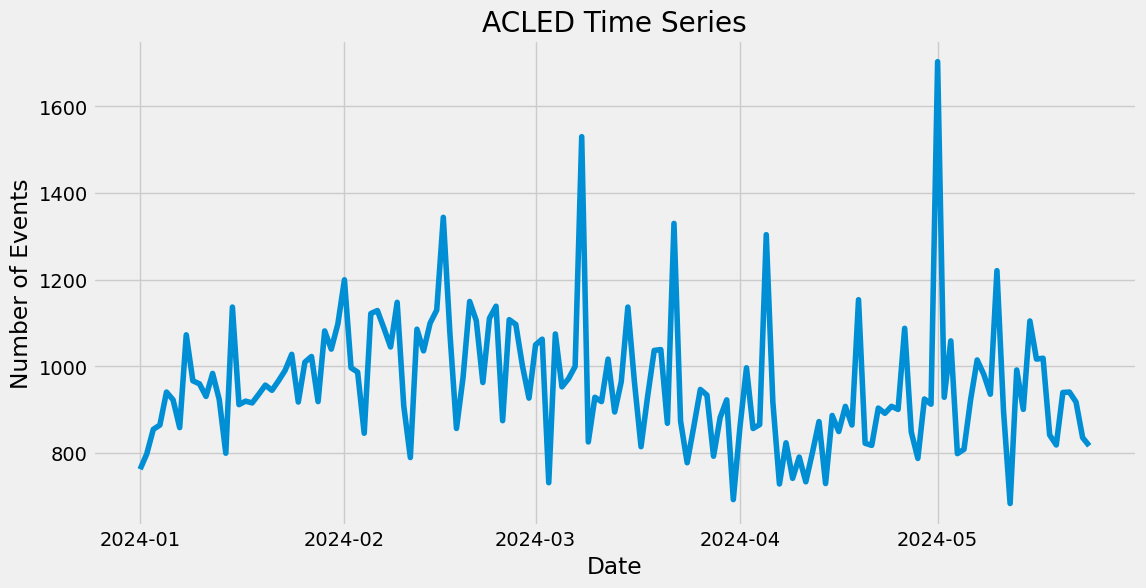

In [11]:
#Visualize Number of Events by DATE
plt.figure(figsize=(12,6))
plt.plot(daily_events['event_date'], daily_events['count'])
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('ACLED Time Series')
plt.show()

### Observation: Most violent conflict events between March 1 to May 1 of 2024 occured on April 5th. We see highest two peaks for number of violent events in early March and then again in early May.

In [12]:
acled_file['country'].value_counts()

country
Ukraine                     17031
India                       10201
Palestine                    8520
United States                5620
Syria                        5373
                            ...  
Saint-Martin                    1
Northern Mariana Islands        1
Antarctica                      1
Wallis and Futuna               1
Qatar                           1
Name: count, Length: 200, dtype: int64

Globally: the most violent events between January 1, 2024 to May 25, 2024 occurred in the top 5 countries: Ukrain, India, Palestine, United States and Syria.

In [13]:
print(acled_file['country'].unique())

['Turkey' 'Yemen' 'Argentina' 'Burkina Faso' 'Bahrain' 'Belize' 'Bolivia'
 'Brazil' 'Cameroon' 'Chile' 'Colombia' 'Cuba' 'Djibouti'
 'Democratic Republic of Congo' 'Ecuador' 'Ethiopia' 'Ghana'
 'Guinea-Bissau' 'Guatemala' 'Guinea' 'Honduras' 'Iraq' 'Israel' 'Jordan'
 'Kenya' 'Lebanon' 'Mauritania' 'Mexico' 'Mali' 'Morocco' 'Nicaragua'
 'Nigeria' 'Paraguay' 'Peru' 'Palestine' 'South Africa' 'Senegal'
 'El Salvador' 'Somalia' 'Sudan' 'Suriname' 'Syria' 'Tunisia' 'Venezuela'
 'Zambia' 'Russia' 'Ukraine' 'Afghanistan' 'Albania' 'Austria' 'Belgium'
 'Bangladesh' 'Bulgaria' 'Canada' 'Switzerland' 'Cyprus' 'Germany' 'Spain'
 'France' 'Georgia' 'Greece' 'Indonesia' 'India' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'South Korea' 'Luxembourg' 'Moldova' 'Myanmar' 'Montenegro'
 'New Caledonia' 'Nepal' 'Netherlands' 'Pakistan' 'Papua New Guinea'
 'Poland' 'Portugal' 'Romania' 'Serbia' 'Sri Lanka' 'Sweden' 'Taiwan'
 'United States' 'Kosovo' 'Algeria' 'Central African Republic' 'Chad'
 'Comoros' 'Costa

In [15]:
#identify how represented in values
acled_file['region'].unique()

array(['Middle East', 'South America', 'Western Africa',
       'Central America', 'Middle Africa', 'Caribbean', 'Eastern Africa',
       'North America', 'Northern Africa', 'Southern Africa', 'Europe',
       'Caucasus and Central Asia', 'South Asia', 'Southeast Asia',
       'East Asia', 'Oceania', 'Antarctica'], dtype=object)

In [16]:
#Subset MENA countries | acled_mena = Represents 30,937 records of violent events in MENA
acled_mena = acled_file[acled_file['region']== 'Middle East']
acled_mena

event_id_cnty event_date  year  time_precision           disorder_type  \
0           TUR36073 2024-05-24  2024               2  Strategic developments   
1           YEM87863 2024-05-24  2024               2      Political violence   
2           YEM87988 2024-05-24  2024               1          Demonstrations   
3           YEM87995 2024-05-24  2024               1          Demonstrations   
17          BHR12822 2024-05-24  2024               1          Demonstrations   
...              ...        ...   ...             ...                     ...   
139103      PSE43059 2024-01-01  2024               1      Political violence   
139104      PSE43074 2024-01-01  2024               1      Political violence   
139105      PSE43090 2024-01-01  2024               1          Demonstrations   
139107      PSE43027 2024-01-01  2024               1      Political violence   
139111      YEM84393 2024-01-01  2024               1      Political violence   

                        event_type                     sub_event_type  \
0           Strategic developments                            Arrests   
1       Explosions/Remote violence  Shelling/artillery/missile attack   
2                         Protests                   Peaceful protest   
3                         Protests                   Peaceful protest   
17                        Protests                   Peaceful protest   
...                            ...                                ...   
139103                       Riots                       Mob violence   
139104                     Battles                        Armed clash   
139105                    Protests                   Peaceful protest   
139107  Violence against civilians                             Attack   
139111  Explosions/Remote violence      Remote explosive/landmine/IED   

                                         actor1  \
0             Military Forces of Turkey (2016-)   
1       Military Forces of Yemen (2017-) Houthi   
2                            Protesters (Yemen)   
3                            Protesters (Yemen)   
17                         Protesters (Bahrain)   
...                                         ...   
139103                      Rioters (Palestine)   
139104  Tulkarm Youth of Revenge and Liberation   
139105                   Protesters (Palestine)   
139107        Military Forces of Israel (2022-)   
139111                      Southern Resistance   

                             assoc_actor_1  inter1  ... latitude longitude  \
0                                      NaN       1  ...  39.4421   26.3447   
1                                      NaN       1  ...  25.5400   35.7110   
2       Government of Yemen (2017-) Houthi       6  ...  17.3509   43.3313   
3       Government of Yemen (2017-) Houthi       6  ...  16.9411   43.5175   
17             February 14 Youth Coalition       6  ...  26.1333   50.6086   
...                                    ...     ...  ...      ...       ...   
139103                                 NaN       5  ...  31.9008   35.2310   
139104                  Katibat Jund Allah       3  ...  32.2846   35.0740   
139105                                 NaN       6  ...  32.4594   35.3009   
139107                                 NaN       8  ...  31.4805   34.9502   
139111                                 NaN       3  ...  15.3478   46.0412   

        geo_precision                                             source  \
0                   2                                  Ihlas News Agency   
1                   3                      Reuters; Yemeni Army - Houthi   
2                   2                                        Ansar Allah   
3                   2                                        Ansar Allah   
17                  1             14 February Revolution Youth Coalition   
...               ...                                                ...   
139103              1  PLO Negotiations Affairs Department; Quds News...   

Filter only on MENA events by using acled_mena

In [17]:
# Aggregate data by country and event type in mena subset
event_counts_mena = acled_mena.groupby([acled_mena['event_date'].dt.year, 'country', 'event_type']).size().unstack(fill_value=0)

In [18]:
event_counts_mena

event_type               Battles  Explosions/Remote violence  Protests  Riots  \
event_date country                                                              
2024       Bahrain             0                           0       277     56   
           Iran               25                          15      1626      9   
           Iraq              315                        2161       297     31   
           Israel            272                         462       546     71   
           Jordan              2                           1       191      2   
           Kuwait              0                           0         1      0   
           Lebanon            41                        3431       145     22   
           Oman                0                           0         0      0   
           Palestine        1120                        4739       182   1403   
           Qatar               0                           0         0      0   
           Saudi Arabia        0                           0         0      0   
           Syria            1132                        2375       636     33   
           Turkey             19                          21      1783     67   
           Yemen             226                         361      2476     22   

event_type               Strategic developments  Violence against civilians  
event_date country                                                           
2024       Bahrain                            5                           1  
           Iran                              55                          28  
           Iraq                             438                         130  
           Israel                           223                          18  
           Jordan                             9                           0  
           Kuwait                             7                           0  
           Lebanon                          116                           7  
           Oman                               1                           0  
           Palestine                        609                         467  
           Qatar                              1                           0  
           Saudi Arabia                       1                           1  
           Syria                            527                         670  
           Turkey                           515                          22  
           Yemen                            304                         188

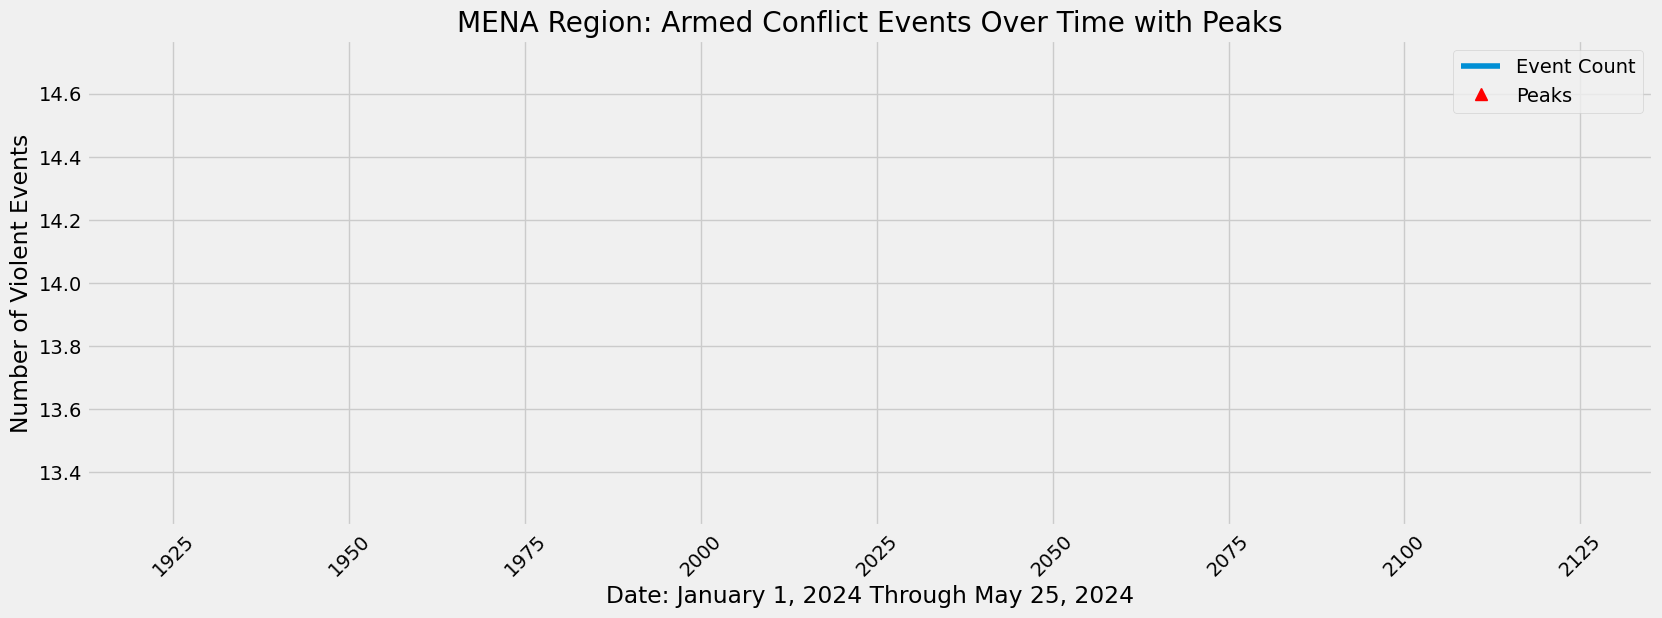

In [20]:
# Aggregate the data (e.g., by date)
aggregated_data = event_counts_mena.groupby(['event_date']).size()

# Identify peaks
peaks, _ = find_peaks(aggregated_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks
plt.figure(figsize=(18, 6))
plt.plot(aggregated_data.index, aggregated_data.values, label='Event Count')
plt.plot(aggregated_data.index[peaks], aggregated_data.values[peaks], 'r^', markersize=8, label='Peaks')
plt.title('MENA Region: Armed Conflict Events Over Time with Peaks')
plt.xlabel('Date: January 1, 2024 Through May 25, 2024')
plt.ylabel('Number of Violent Events')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Subset of Palestine and Israel

In [23]:
# Filter the data for Israel and Palestine
palestine_israel_data = acled_file[acled_file['country'].isin(['Palestine', 'Israel'])]
palestine_israel_data

event_id_cnty event_date  year  time_precision           disorder_type  \
98          ISR40263 2024-05-24  2024               1  Strategic developments   
99          ISR40264 2024-05-24  2024               1          Demonstrations   
100         ISR40265 2024-05-24  2024               1      Political violence   
101         ISR40266 2024-05-24  2024               1      Political violence   
102         ISR40267 2024-05-24  2024               1  Strategic developments   
...              ...        ...   ...             ...                     ...   
139102      PSE43015 2024-01-01  2024               1          Demonstrations   
139103      PSE43059 2024-01-01  2024               1      Political violence   
139104      PSE43074 2024-01-01  2024               1      Political violence   
139105      PSE43090 2024-01-01  2024               1          Demonstrations   
139107      PSE43027 2024-01-01  2024               1      Political violence   

                        event_type         sub_event_type  \
98          Strategic developments  Disrupted weapons use   
99                        Protests       Peaceful protest   
100                        Battles            Armed clash   
101                        Battles            Armed clash   
102         Strategic developments  Disrupted weapons use   
...                            ...                    ...   
139102                    Protests       Peaceful protest   
139103                       Riots           Mob violence   
139104                     Battles            Armed clash   
139105                    Protests       Peaceful protest   
139107  Violence against civilians                 Attack   

                                         actor1         assoc_actor_1  inter1  \
98            Military Forces of Israel (2022-)                   NaN       1   
99                          Protesters (Israel)                   NaN       6   
100                                   Hezbollah                   NaN       3   
101                                   Hezbollah                   NaN       3   
102           Military Forces of Israel (2022-)                   NaN       1   
...                                         ...                   ...     ...   
139102                   Protesters (Palestine)  Students (Palestine)       6   
139103                      Rioters (Palestine)                   NaN       5   
139104  Tulkarm Youth of Revenge and Liberation    Katibat Jund Allah       3   
139105                   Protesters (Palestine)                   NaN       6   
139107        Military Forces of Israel (2022-)                   NaN       8   

        ... latitude longitude  geo_precision  \
98      ...  32.9647   35.4960              2   
99      ...  32.0809   34.7806              1   
100     ...  33.1969   35.5439              1   
101     ...  33.0522   35.4081              1   
102     ...  33.0814   35.5174              2   
...     ...      ...       ...            ...   
139102  ...  31.8996   35.2042              1   
139103  ...  31.9008   35.2310              1   
139104  ...  32.2846   35.0740              1   
139105  ...  32.4594   35.3009              1   
139107  ...  31.4805   34.9502              2   

                                                   source       source_scale  \
98               Haaretz; Jerusalem Post; Times of Israel           National   
99                                        Times of Israel           National   
100                        Haaretz; Times of Israel; Ynet           National   
101                        Haaretz; Times of Israel; Ynet           National   
102                                 Times of Israel; Ynet           National   
...                                                   ...                ...   
139102  Palestine News and Information Agency; Press T...  National-Regional   
139103  PLO Negotiations Affairs Department; Quds News...     Other-National   
139104             

In [41]:
#Itemize the actors involved listed the most in Palestine  & Israel
palestine_israel_data['actor1'].value_counts()

actor1
Military Forces of Israel (2022-)                   5266
Rioters (Palestine)                                  972
Hamas Movement                                       695
Hezbollah                                            637
Protesters (Israel)                                  554
                                                    ... 
Al Ashtar Brigades                                     1
Military Forces of Israel (2022-) Special Forces       1
Islamic Resistance in Iraq                             1
Unidentified Armed Group (Jordan)                      1
Katibat Maythalun                                      1
Name: count, Length: 68, dtype: int64

In [42]:
#Itemize the secondary actor count
palestine_israel_data['assoc_actor_1'].value_counts()

assoc_actor_1
Settlers (Israel)                                                                            416
Refugees/IDPs (Palestine)                                                                    111
Rioters (Palestine)                                                                           81
PIJ: Palestinian Islamic Jihad                                                                56
Refugees/IDPs (Palestine); Rioters (Palestine)                                                41
                                                                                            ... 
Arab Ethnic Group (Israel); Government of Israel (2022-); High Follow-Up Committee             1
Katibat Qabatiyah; Qabatiya Engineering Unit; Rioters (Palestine)                              1
Commission of Detainees and Ex-Detainees Affairs; Palestinian National and Islamic Forces      1
Im Tirtzu                                                                                      1
Labor Group (Isr

In [43]:
palestine_israel_data['actor2'].value_counts()

actor2
Civilians (Palestine)                                                3034
Military Forces of Israel (2022-)                                    2595
Civilians (Israel)                                                    195
Police Forces of Israel (2022-)                                       186
Hamas Movement                                                        162
Hezbollah                                                              73
Unidentified Armed Group (Palestine)                                   40
Police Forces of Palestine (1994-) West Bank                           25
Rioters (Israel)                                                       17
Rioters (Palestine)                                                    16
Police Forces of Palestine (2007-) Gaza Strip                          14
Police Forces of Israel (2022-) Border Police                          11
Military Forces of Iran (1989-) Islamic Revolutionary Guard Corps      11
Military Forces of Israel (2022

In [53]:
#identify where IOF targets civilians
iof_targets_civilians = (palestine_israel_data[palestine_israel_data['actor1'] == 'Military Forces of Israel (2022-)']) & (palestine_israel_data[palestine_israel_data['actor2'] == 'Civilians (Palestine)'])
iof_targets_civilians.value_counts()

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [61]:
# check if all elements are true

iof_targets_civilians = palestine_israel_data[
    (palestine_israel_data['actor1'] == 'Military Forces of Israel (2022-)') &
    (palestine_israel_data['actor2'] == 'Civilians (Palestine)')
]

# Count the occurrences or display the filtered DataFrame
print(iof_targets_civilians.value_counts())  # To count occurrences
# or
print(iof_targets_civilians)  # To display the filtered DataFrame

Series([], Name: count, dtype: int64)
       event_id_cnty event_date  year  time_precision           disorder_type  \
243         PSE52861 2024-05-24  2024               1      Political violence   
244         PSE52862 2024-05-24  2024               1      Political violence   
249         PSE52867 2024-05-24  2024               1      Political violence   
251         PSE52869 2024-05-24  2024               1      Political violence   
252         PSE52870 2024-05-24  2024               1      Political violence   
...              ...        ...   ...             ...                     ...   
139047      PSE42763 2024-01-01  2024               1      Political violence   
139050      PSE42814 2024-01-01  2024               1      Political violence   
139094      PSE42738 2024-01-01  2024               1      Political violence   
139101      PSE43013 2024-01-01  2024               1  Strategic developments   
139107      PSE43027 2024-01-01  2024               1      Political vi

Of IOF forces as 'actor1', there are 2,506 events where the target, or 'actor2' was 'Civilians in Palestine'.

Conflict data filtering on "Palestine" and "Israel" shows that 10,112 violent events occured.

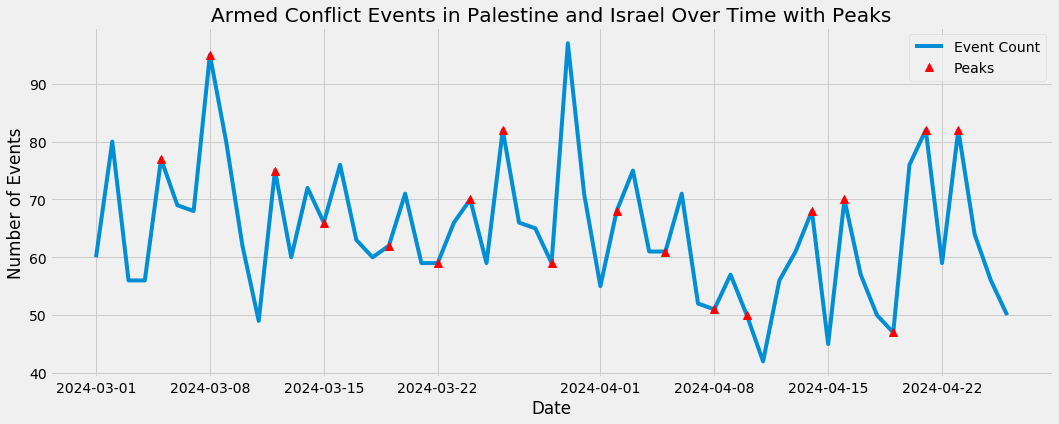

In [ ]:
# Aggregate the data (e.g., by date)
agg_palestine_data = palestine_israel_data.groupby(['event_date']).size()

# Identify peaks
p_peaks, _ = find_peaks(agg_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks
plt.figure(figsize=(16, 6))
plt.plot(agg_palestine_data.index, agg_palestine_data, label='Event Count')
plt.plot(agg_palestine_data.index[peaks], agg_palestine_data.values[peaks], 'r^', markersize=8, label='Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#Subset data without Palestine and Israel
filtered_data = acled_file.drop(acled_file[(acled_file['country'] == 'Israel') | (acled_file['country'] == 'Palestine')].index)
filtered_data # plot this line below Palestine line

event_id_cnty event_date  year  time_precision           disorder_type  \
0           TUR36073 2024-05-24  2024               2  Strategic developments   
1           YEM87863 2024-05-24  2024               2      Political violence   
2           YEM87988 2024-05-24  2024               1          Demonstrations   
3           YEM87995 2024-05-24  2024               1          Demonstrations   
4           ARG15128 2024-05-24  2024               1          Demonstrations   
...              ...        ...   ...             ...                     ...   
139116     PAK138050 2024-01-01  2024               1          Demonstrations   
139117     UKR142692 2024-01-01  2024               1      Political violence   
139118       BEN1282 2024-01-01  2024               1      Political violence   
139119       BEN1341 2024-01-01  2024               1      Political violence   
139120       BEN1342 2024-01-01  2024               1      Political violence   

                        event_type                     sub_event_type  \
0           Strategic developments                            Arrests   
1       Explosions/Remote violence  Shelling/artillery/missile attack   
2                         Protests                   Peaceful protest   
3                         Protests                   Peaceful protest   
4                         Protests                   Peaceful protest   
...                            ...                                ...   
139116                    Protests                   Peaceful protest   
139117  Explosions/Remote violence                   Air/drone strike   
139118                     Battles                        Armed clash   
139119                     Battles                        Armed clash   
139120  Violence against civilians     Abduction/forced disappearance   

                                              actor1  \
0                  Military Forces of Turkey (2016-)   
1            Military Forces of Yemen (2017-) Houthi   
2                                 Protesters (Yemen)   
3                                 Protesters (Yemen)   
4                             Protesters (Argentina)   
...                                              ...   
139116                         Protesters (Pakistan)   
139117   Military Forces of Russia (2000-) Air Force   
139118              Military Forces of Benin (2016-)   
139119              Military Forces of Benin (2016-)   
139120  JNIM: Group for Support of Islam and Muslims   

                                            assoc_actor_1  inter1  ...  \
0                                                     NaN       1  ...   
1                                                     NaN       1  ...   
2                      Government of Yemen (2017-) Houthi       6  ...   
3                      Government of Yemen (2017-) Houthi       6  ...   
4       CTA-A: Argentine Workers' Central Union - Auto...       6  ...   
...                                                   ...     ...  ...   
139116                             Labor Group (Pakistan)       6  ...   
139117                  Military Forces of Russia (2000-)       8  ...   
139118                                                NaN       1  ...   
139119                                                NaN       1  ...   
139120                                                NaN       2  ...   

       latitude longitude  geo_precision                         source  \
0       39.4421   26.3447              2              Ihlas News Agency   
1       25.5400   35.7110              3  Reuters; Yemeni Army - Houthi   
2       17.3509   43.3313              2                    Ansar Allah   
3       16.9411   43.5175              2                    Ansar Allah   
4      -34.6141  -58.4579              1          La Nacion (Argentina)   
...         ...       ...            ...                            ...   
139116  31.5497   74.3436              1   Pakistan Press Internationa

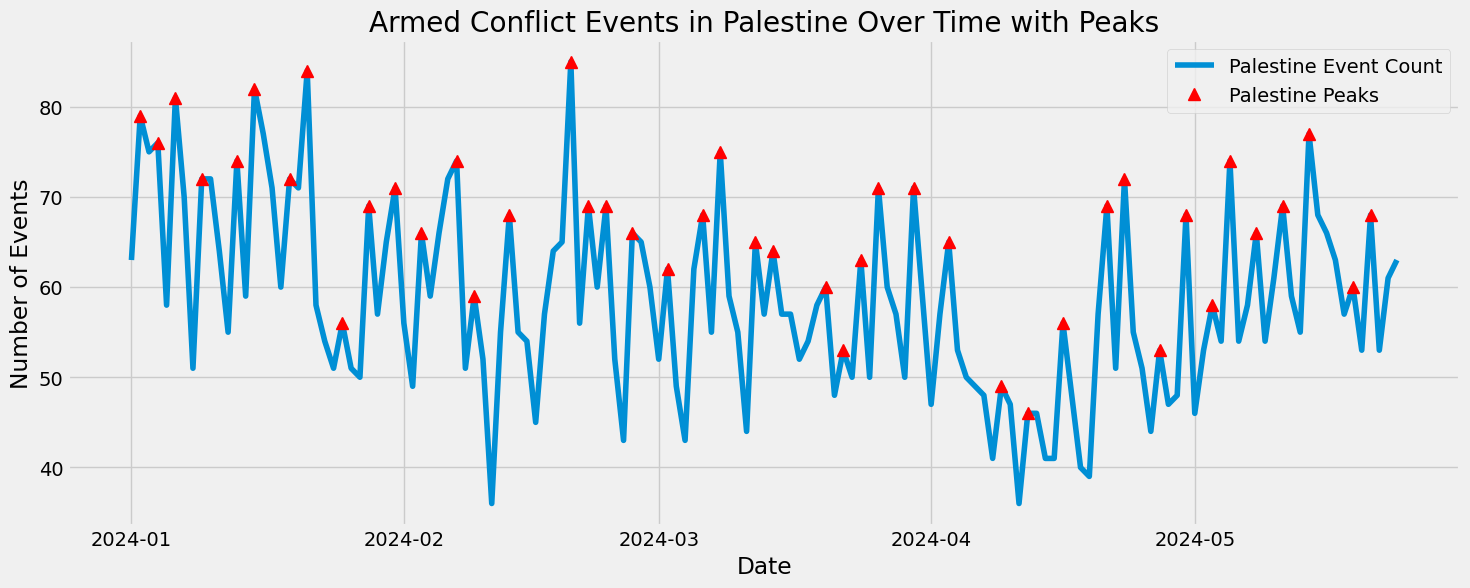

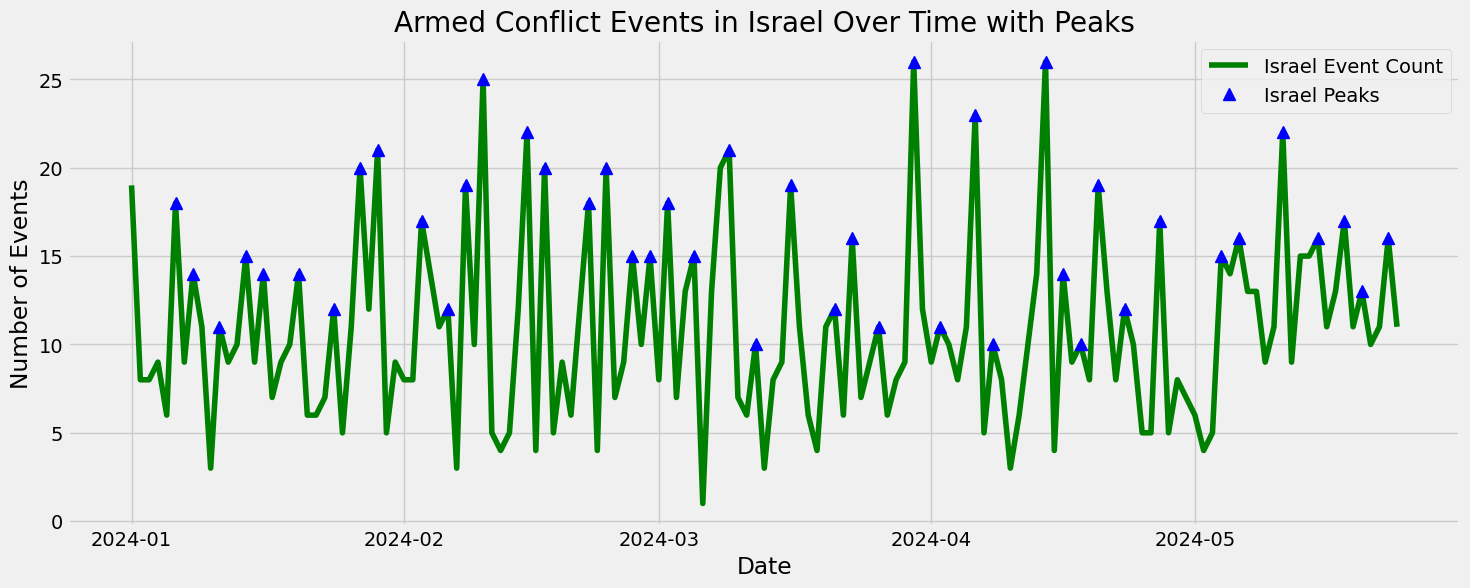

In [28]:
# Aggregate the data (e.g., by date) for Palestine
aggregated_palestine_data = palestine_data.groupby(['event_date']).size()

# Identify peaks for Palestine
peaks_palestine, _ = find_peaks(aggregated_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Palestine
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.title('Armed Conflict Events in Palestine Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

# Aggregate the data (e.g., by date) for Israel
aggregated_israel_data = israel_data.groupby(['event_date']).size()

# Identify peaks for Israel
peaks_israel, _ = find_peaks(aggregated_israel_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Israel
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='green')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

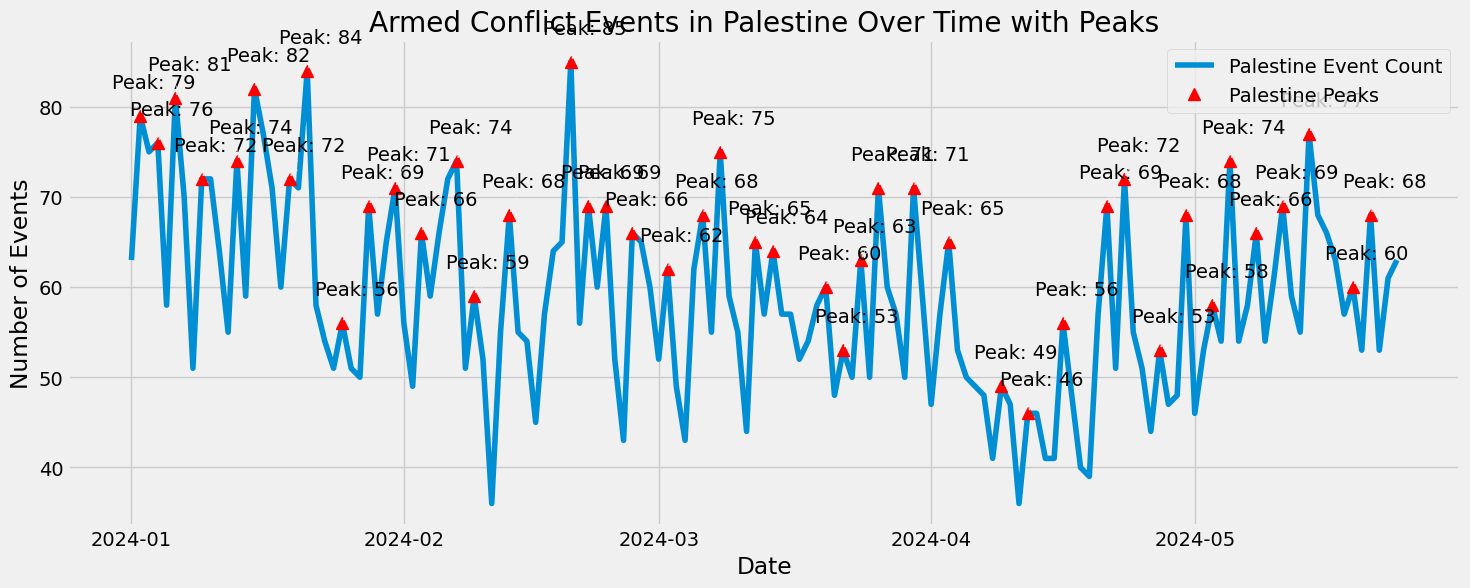

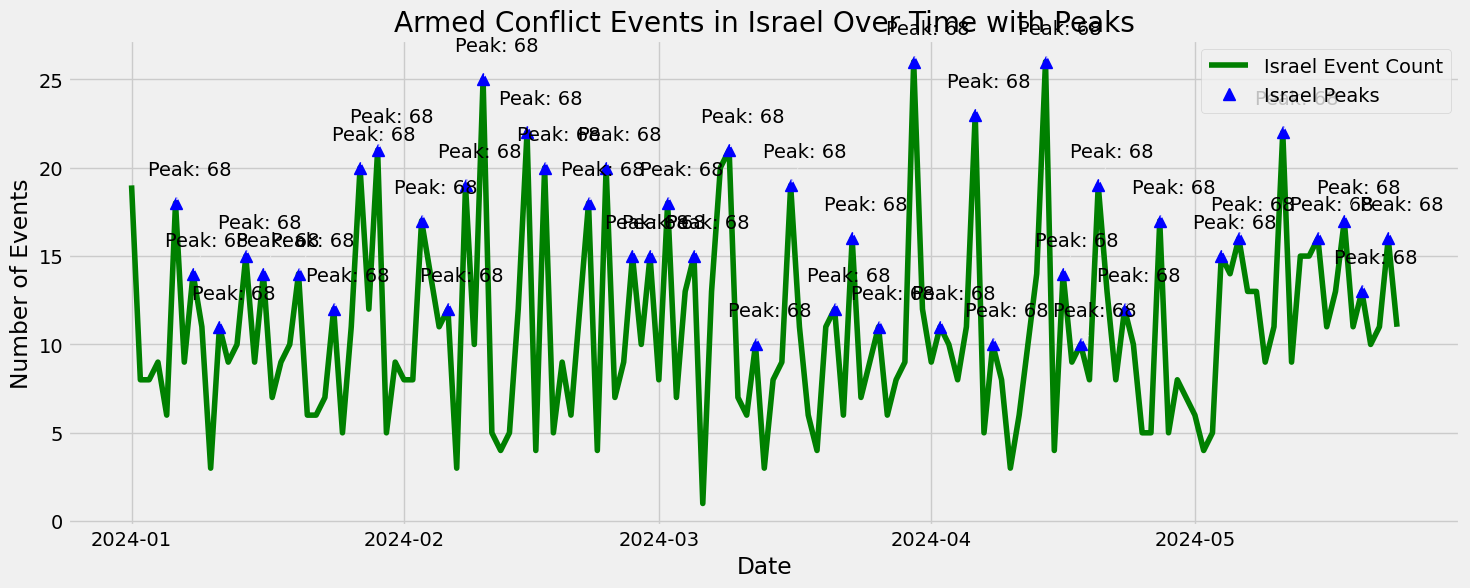

In [29]:
# Test Insert Annotations
#Aggregate the data (e.g., by date) for Palestine
aggregated_palestine_data = palestine_data.groupby(['event_date']).size()

# Identify peaks for Palestine
peaks_palestine, _ = find_peaks(aggregated_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Palestine
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.title('Armed Conflict Events in Palestine Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in top line graph for Palestine
for peak_index in peaks_palestine:
    peak_date = aggregated_palestine_data.index[peak_index]
    peak_value = aggregated_palestine_data.values[peak_index]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date, peak_value), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

# Aggregate the data (e.g., by date) for Israel
aggregated_israel_data = israel_data.groupby(['event_date']).size()

# Identify peaks for Israel
peaks_israel, _ = find_peaks(aggregated_israel_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Israel
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='green')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in bottom line graph for Israel
for peak_index_1 in peaks_israel:
    peak_date_1 = aggregated_israel_data.index[peak_index_1]
    peak_value_1 = aggregated_israel_data.values[peak_index_1]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date_1, peak_value_1), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.show()

## Palestine Versus Israel Event Comparison

In [26]:
# Filter the data for Palestine and Israel
palestine_data = acled_file[acled_file['country'] == 'Palestine']
israel_data = acled_file[acled_file['country'] == 'Israel']

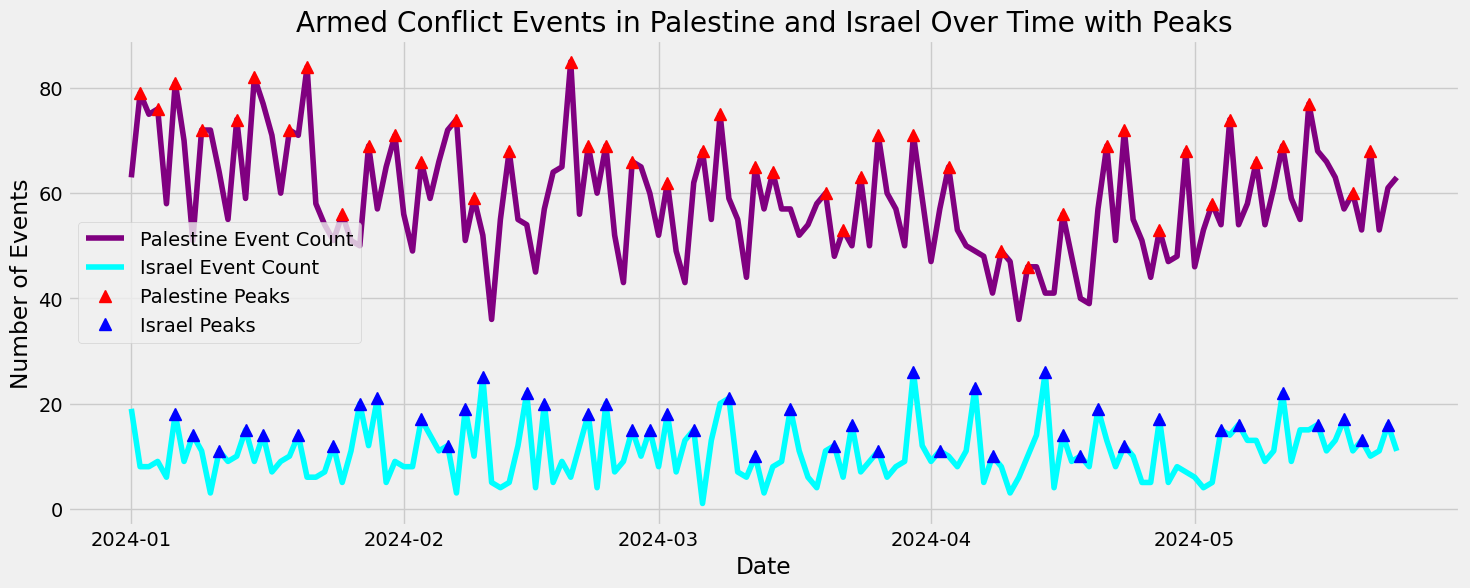

In [30]:
#Same Visual with Both Country Trends in Ramadan
# Visualize the data for Palestine and Israel in the same plot with peaks
plt.figure(figsize=(16, 6))
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='aqua')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

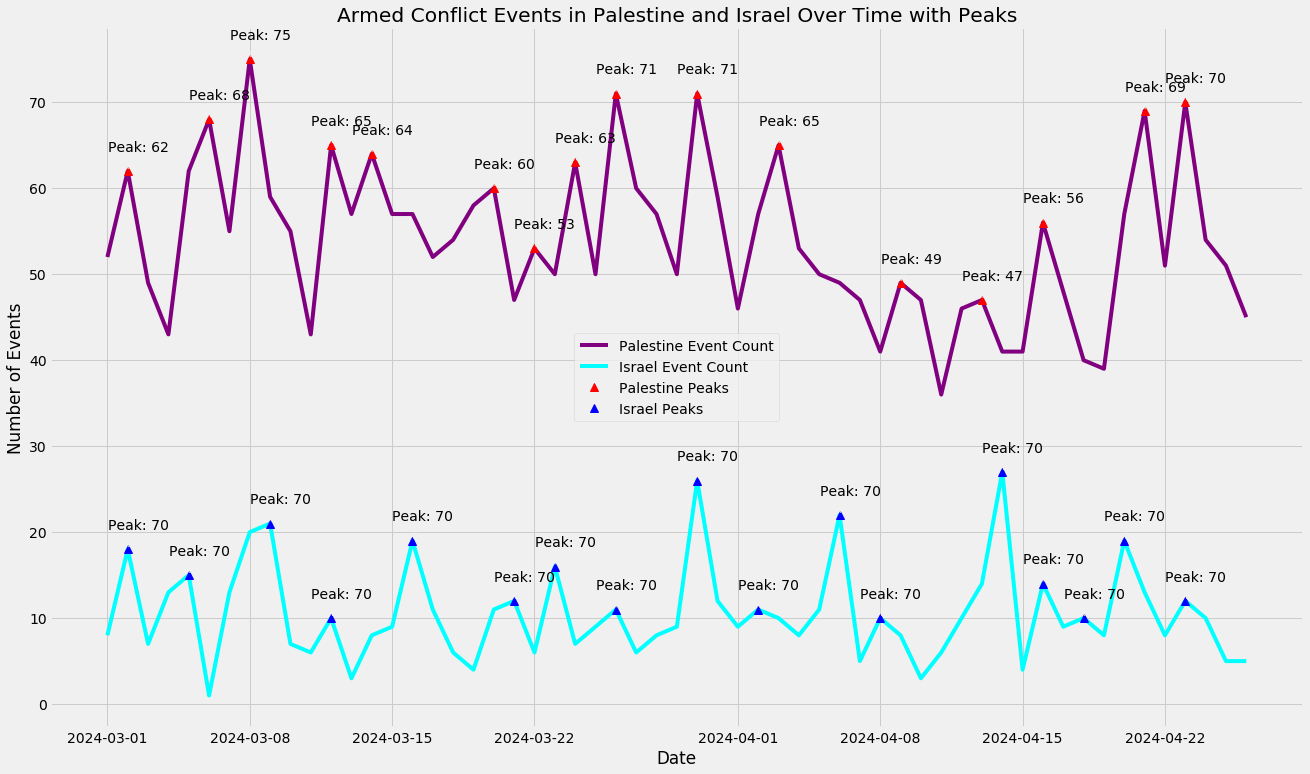

In [ ]:
#Same Visual with Both Country Trends in Ramadan
# Visualize the data for Palestine and Israel in the same plot with peaks
plt.figure(figsize=(20, 12))
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='aqua')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in top line graph for Palestine
for peak_index in peaks_palestine:
    peak_date = aggregated_palestine_data.index[peak_index]
    peak_value = aggregated_palestine_data.values[peak_index]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date, peak_value), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

# Annotate peak points in bottom line graph for Israel
for peak_index_1 in peaks_israel:
    peak_date_1 = aggregated_israel_data.index[peak_index_1]
    peak_value_1 = aggregated_israel_data.values[peak_index_1]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date_1, peak_value_1), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

### Visual: Palestine & MENA without Israel Comparison to Check Fridays

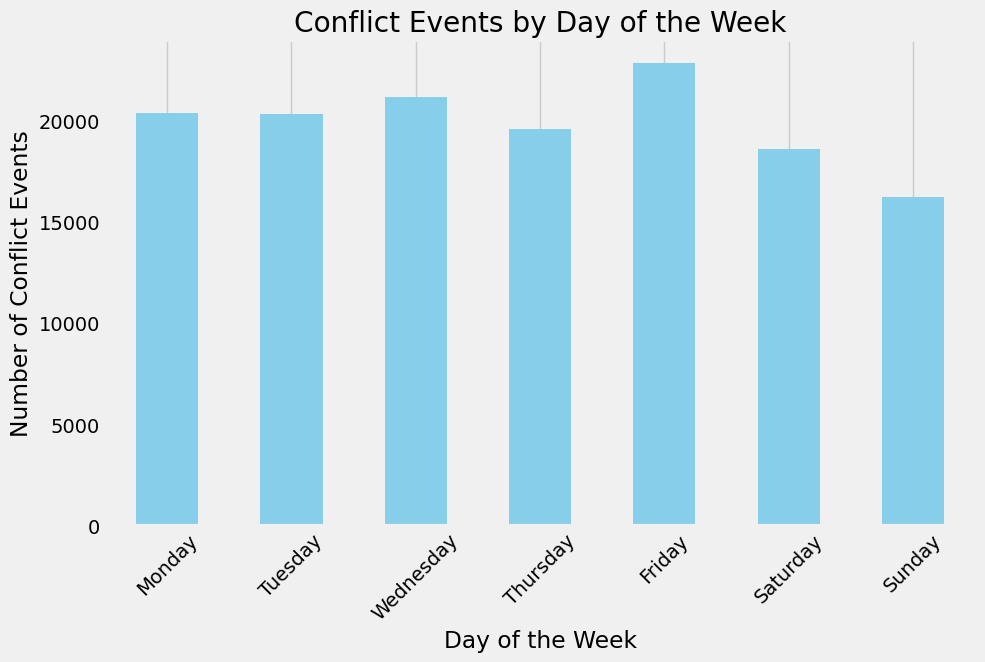

In [31]:
# Load the ACLED dataset into a DataFrame
#acled_data = pd.read_csv("acled_data.csv")

# Preprocess the data
#acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])  # Convert to datetime format

# Extract day of the week
acled_file['day_of_week'] = acled_file['event_date'].dt.day_name()

# Aggregate data by day of the week
conflicts_by_day = acled_file.groupby('day_of_week').size()

# Reorder days of the week for visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conflicts_by_day = conflicts_by_day.reindex(days_order)

# Visualize conflict data by day of the week
plt.figure(figsize=(10, 6))
conflicts_by_day.plot(kind='bar', color='skyblue')
plt.title('Conflict Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Conflict Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Observation: Top 5 Peaks

* 1) March 8th, Friday
* 2) April 5th, Friday
* 3) March 22nd, Friday
* 4) March 29th, Friday
* 5) *April 13th, Friday

Fridays: March 15th, March 22nd , March 29th
April 5th, April 12th , April 19th, April 26th

Saturdays: March 16h, March 23, March 30
    April 6, *April 13, *April 20, *April 27th
### Note: * in front of days not in Ramadan

### Visualize Fatalities in Palestine

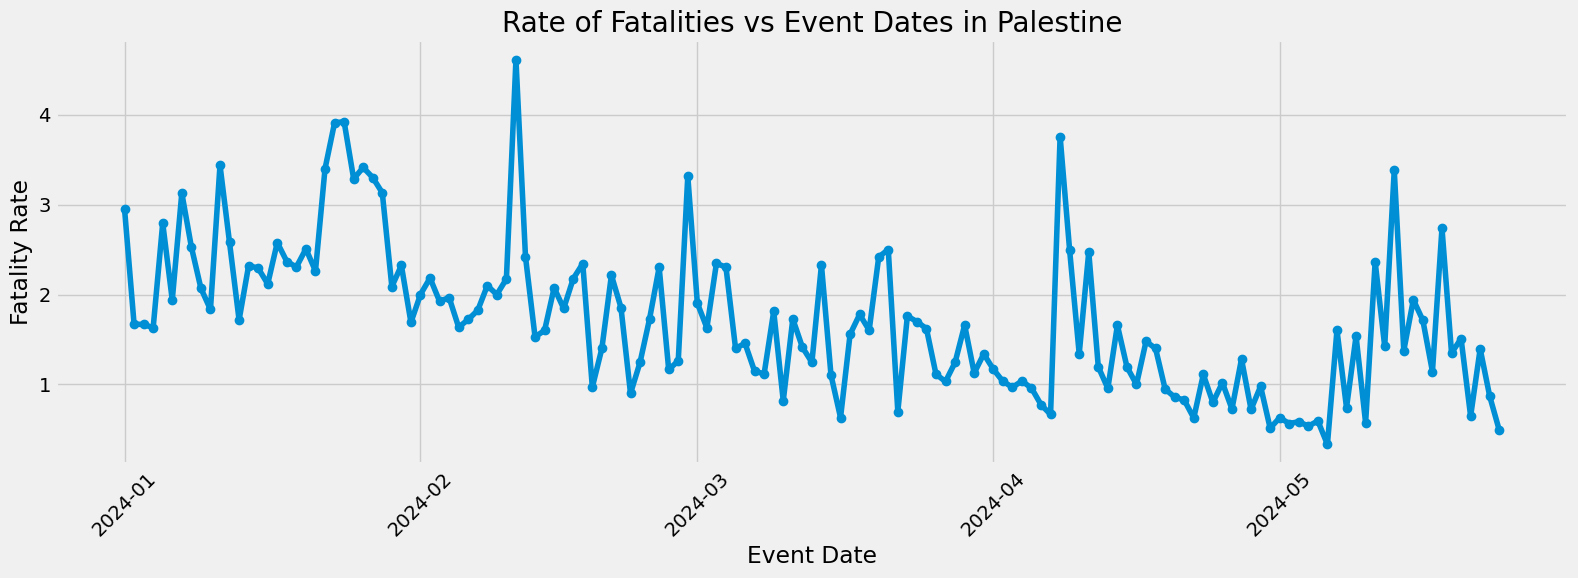

In [32]:
# Filter the data for Palestine
palestine_data_fatal = acled_file[acled_file['country'] == 'Palestine']

# Group the data by event date and calculate the total fatalities and total number of events for each day
grouped_data_p = palestine_data_fatal.groupby('event_date').agg({'fatalities': 'sum', 'event_type': 'count'})
grouped_data_p = grouped_data_p.rename(columns={'event_type': 'total_events'})

# Calculate the rate of fatalities by dividing total fatalities by total events for each day
grouped_data_p['fatality_rate'] = grouped_data_p['fatalities'] / grouped_data_p['total_events']


# Plot the rate of fatalities versus event dates
plt.figure(figsize=(16, 6))
plt.plot(grouped_data_p.index, grouped_data_p['fatality_rate'], marker='o', linestyle='-')
plt.title('Rate of Fatalities vs Event Dates in Palestine')
plt.xlabel('Event Date')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

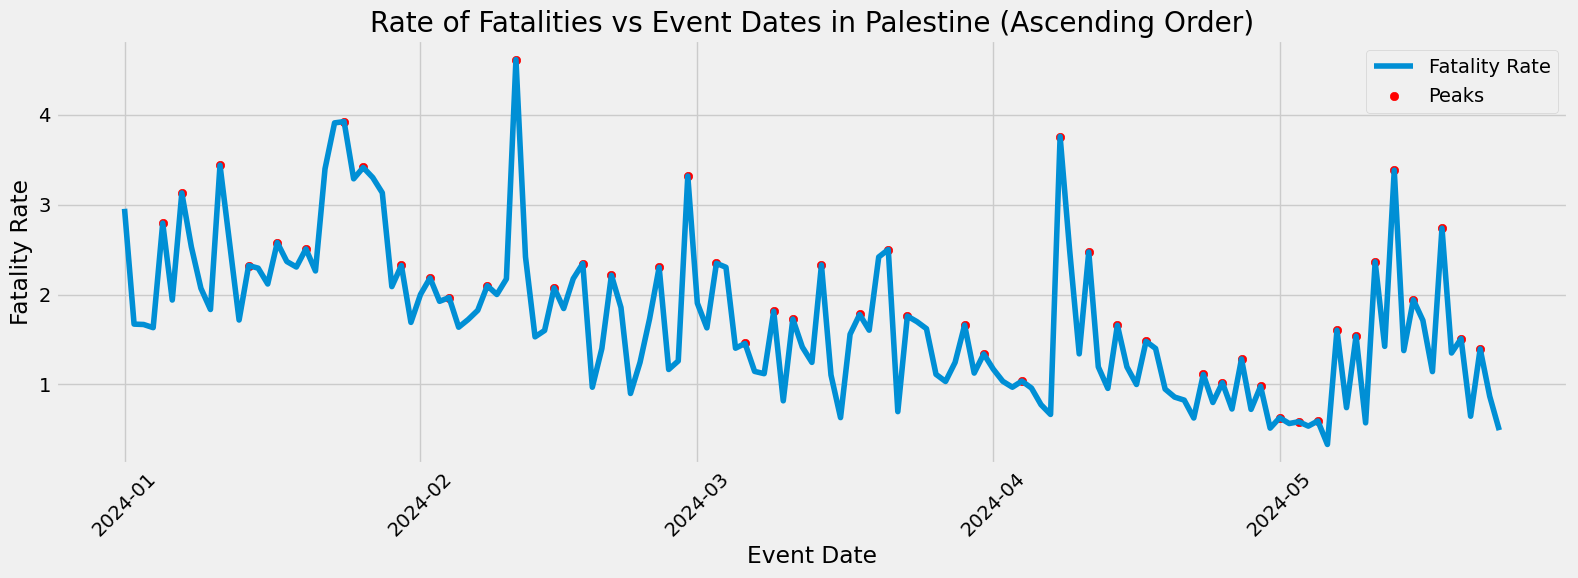

In [33]:
# Filter the data for Palestine
palestine_data_fatalities = acled_file[acled_file['country'] == 'Palestine']

# Group the data by event date and calculate the total fatalities and total number of events for each day
grouped_data_p_f = palestine_data_fatalities.groupby('event_date').agg({'fatalities': 'sum', 'event_type': 'count'})
grouped_data_p_f = grouped_data_p_f.rename(columns={'event_type': 'total_events'})

# Calculate the rate of fatalities by dividing total fatalities by total events for each day
grouped_data_p_f['fatality_rate'] = grouped_data_p_f['fatalities'] / grouped_data_p_f['total_events']

# Sort the data by event date in ascending order
grouped_data_p_f = grouped_data_p_f.sort_index()

# Identify peaks in the fatality rate data
peaks_p_f, _ = find_peaks(grouped_data_p_f['fatality_rate'], height=0.1)  # Adjust height threshold as needed

# Plot the fatality rate versus event dates
plt.figure(figsize=(16, 6))
plt.plot(grouped_data_p_f.index, grouped_data_p_f['fatality_rate'], label='Fatality Rate')
plt.scatter(grouped_data_p_f.index[peaks_p_f], grouped_data_p_f['fatality_rate'][peaks_p_f], color='red', marker='o', label='Peaks')
plt.title('Rate of Fatalities vs Event Dates in Palestine (Ascending Order)')
plt.xlabel('Event Date')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Annotate peak points
#for peak_index_p_f in peaks_p_f:
 #   plt.annotate('Peak', xy=(grouped_data_p_f.index[peak_index_p_f], grouped_data_p_f['fatality_rate'][peak_index_p_f]),
  #               xytext=(grouped_data_p_f.index[peak_index_p_f] + pd.DateOffset(days=3), grouped_data_p_f['fatality_rate'][peak_index] + 0.05),
   #              arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.tight_layout()
plt.show()

### Distributions of Fatalities Versus Civilian Targeting
* What's the distinction between these two data columns?
ACLED 'fatalities'column translates into the number of people who have died as a result of a violent event. Fatalities can include both combatants (such as armed group members or military personnel) and civilians.

In contrast, 'civilian_targeting' columns refers to the intentional or deliberate targeting of civilians during a violent event. Civilian targeting incidents specifically focus on acts of violence directed at non-combatant individuals or groups, with the intention of causing harm or instilling fear among civilian populations. This can include attacks on civilian infrastructure, such as schools, hospitals, or residential areas, as well as direct attacks on civilians themselves.
Consequently, fatalities represent the total number of deaths resulting from a violent event, regardless of whether the victims are combatants or civilians. On the other hand, civilian targeting specifically captures incidents where civilians are the primary focus or victims of violence.

In [35]:
# Filter the data for Palestine
palestine_subset = acled_file[acled_file['country'] == 'Palestine']

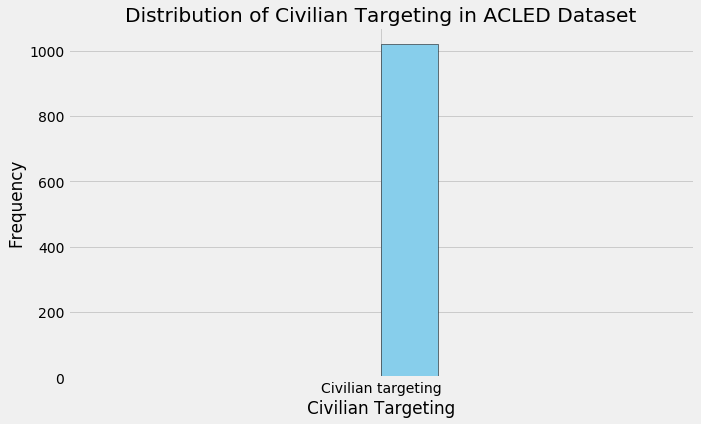

In [ ]:
# Plot a histogram of civilian_targeting
plt.figure(figsize=(10, 6))
plt.hist(palestine_subset['civilian_targeting'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Civilian Targeting in ACLED Dataset')
plt.xlabel('Civilian Targeting')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

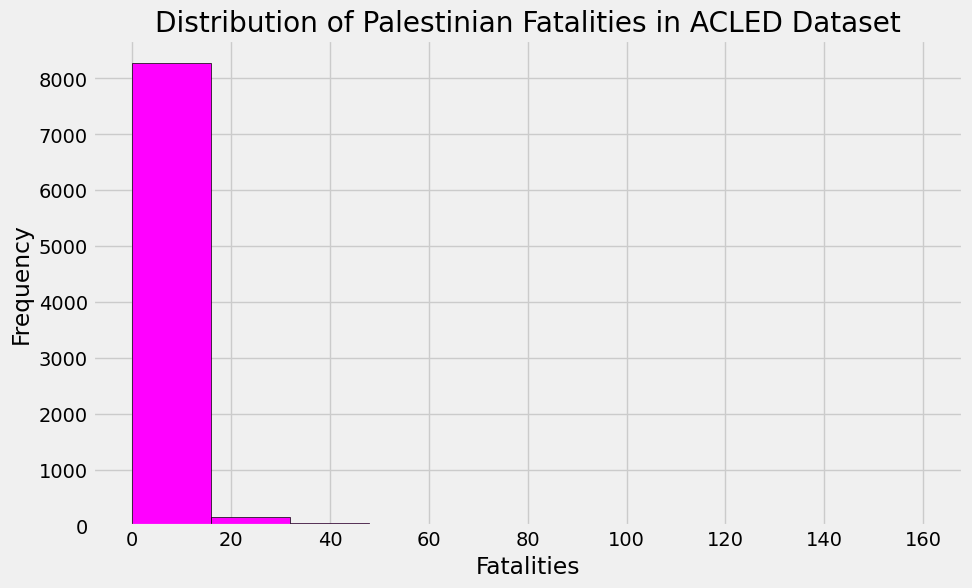

In [36]:
# Plot a histogram of fatalities
plt.figure(figsize=(10, 6))
plt.hist(palestine_subset['fatalities'].dropna(), bins=10, color='magenta', edgecolor='black')
plt.title('Distribution of Palestinian Fatalities in ACLED Dataset')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

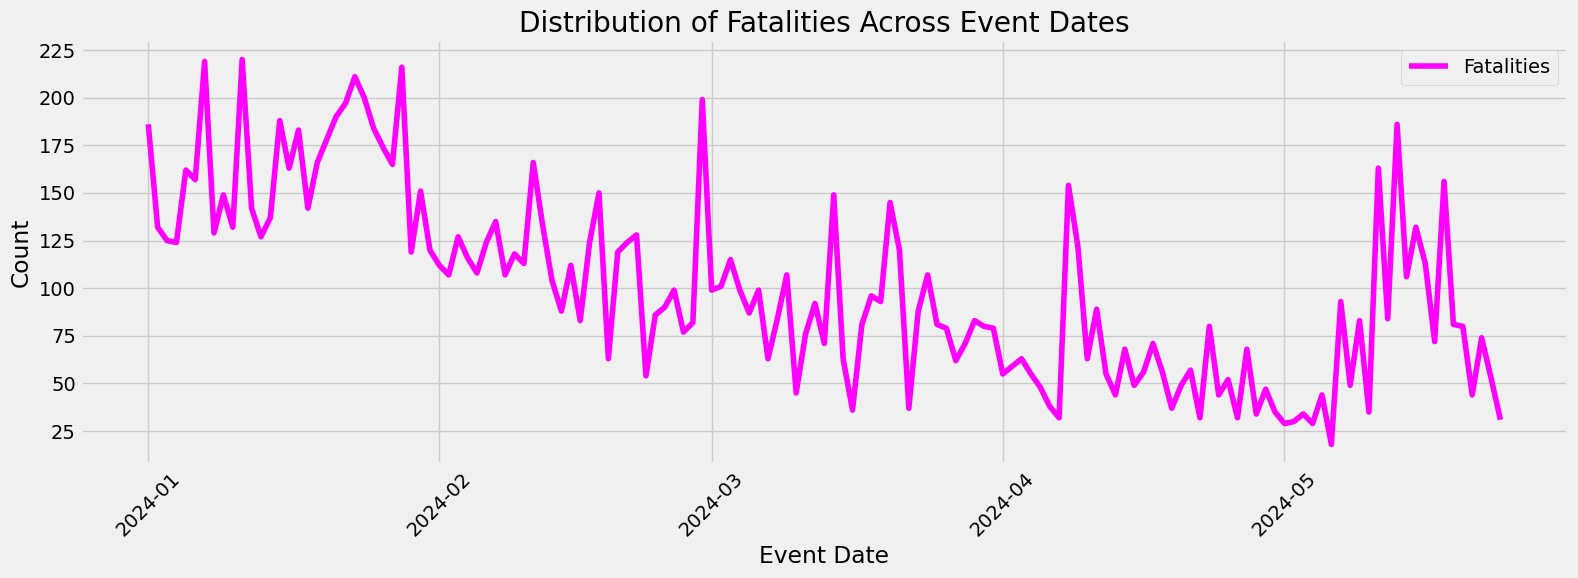

In [37]:
# Group the data by event_date and sum the fatalities
grouped_fatalities = palestine_subset.groupby('event_date')['fatalities'].sum().reset_index()

# Plot the distribution of fatalities across event_dates
plt.figure(figsize=(16, 6))

# Plot fatalities
plt.plot(grouped_fatalities['event_date'], grouped_fatalities['fatalities'], label='Fatalities', color='magenta')

plt.title('Distribution of Fatalities Across Event Dates')
plt.xlabel('Event Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

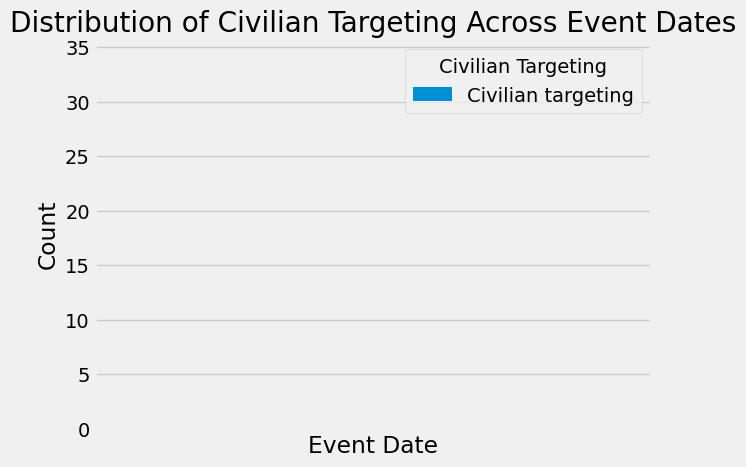

In [38]:
# Group the data by event_date and civilian_targeting, and count the occurrences
grouped_civilian_targeting = palestine_subset.groupby(['event_date', 'civilian_targeting']).size().unstack(fill_value=0)

# Plot the distribution of civilian_targeting across event_dates
plt.figure(figsize=(18, 8))

# Plot civilian targeting
grouped_civilian_targeting.plot(kind='bar', stacked=True)

plt.title('Distribution of Civilian Targeting Across Event Dates')
plt.xlabel('Event Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Civilian Targeting')
#plt.tight_layout()
# Expand x-axis
plt.xlim(grouped_civilian_targeting.index[-1], grouped_civilian_targeting.index[1])
plt.show()

## Visual of Palestine Versus All MENA Except Israel

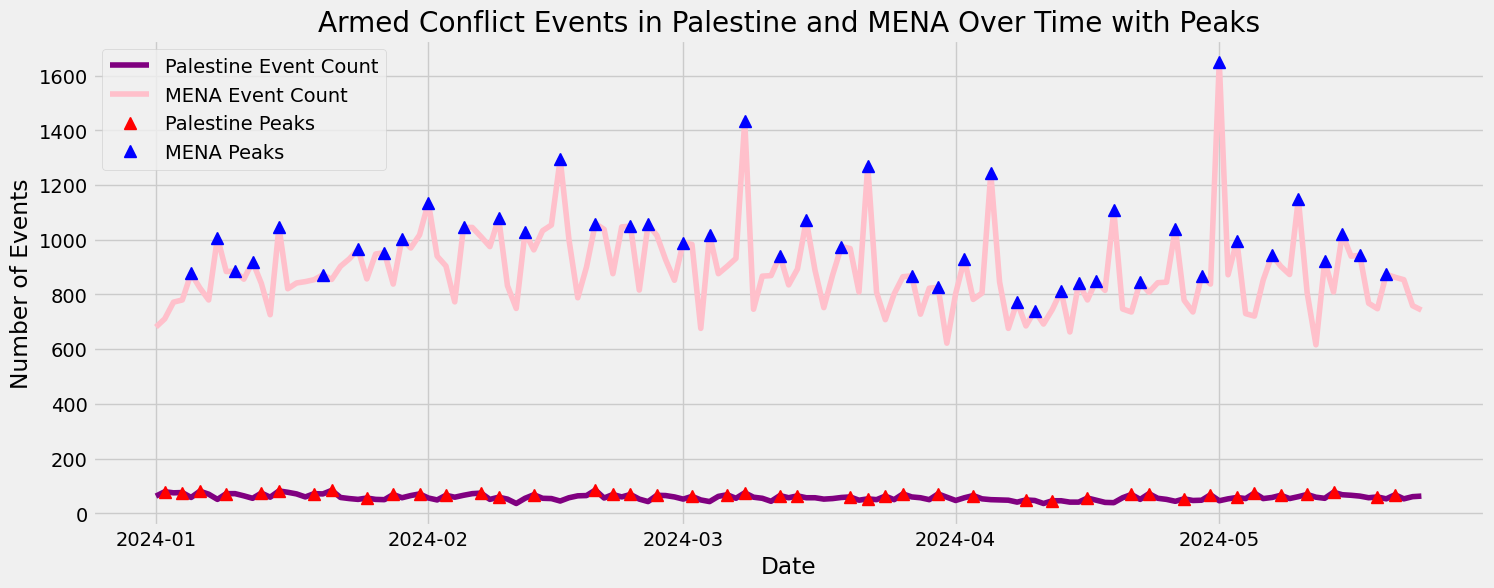

In [39]:
# Visualize the data for Palestine and MENA in the same plot with peaks
plt.figure(figsize=(16, 6))

#Plot Palestine Line as Purple
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')

#Plot MENA Without Israel as light pink using filtered_data to aggregate
# Aggregate the data (e.g., by date) for MENA
aggregated_mena_data = filtered_data.groupby(['event_date']).size()

# Identify peaks for MENA
peaks_mena, _ = find_peaks(aggregated_mena_data, height=10)  # Adjust the height threshold as needed

plt.plot(aggregated_mena_data.index, aggregated_mena_data.values, label='MENA Event Count', color='pink')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')

plt.plot(aggregated_mena_data.index[peaks_mena], aggregated_mena_data.values[peaks_mena], 'b^', markersize=8, label='MENA Peaks')
plt.title('Armed Conflict Events in Palestine and MENA Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Organize a Table that includes fatalities
palestine_subset.groupby('disorder_type')['sub_event_type'].value_counts()

disorder_type           sub_event_type                   
Demonstrations          Peaceful protest                      177
                        Violent demonstration                  16
                        Protest with intervention               5
Political violence      Air/drone strike                     2467
                        Shelling/artillery/missile attack    2123
                        Mob violence                         1387
                        Armed clash                          1120
                        Attack                                465
                        Remote explosive/landmine/IED          78
                        Grenade                                71
                        Abduction/forced disappearance          2
Strategic developments  Looting/property destruction          447
                        Other                                 104
                        Change to group/activity               20
                  

In [ ]:
#Organize a Table that includes fatalities

# Create a pivot table
pivot_table_fatalities = pd.pivot_table(palestine_subset, values='fatalities', index=['disorder_type', 'sub_event_type'], aggfunc='sum')

print(pivot_table_fatalities)

                                                          fatalities
disorder_type          sub_event_type                               
Demonstrations         Peaceful protest                            0
                       Protest with intervention                   0
                       Violent demonstration                       0
Political violence     Abduction/forced disappearance              0
                       Air/drone strike                         3150
                       Armed clash                               449
                       Attack                                    157
                       Grenade                                     0
                       Mob violence                                7
                       Remote explosive/landmine/IED               1
                       Shelling/artillery/missile attack         276
Strategic developments Arrests                                     0
                       Change to g

### Observation:
The highest number of fatalities occured under 'Air/drone strike' with  3150 fatalities followed by 'Armed clash' resulting in 449 fatalities. The theirs is 'Shelling/artillery/missile attack' with         276 fatalities. These are all categorized as 'Political violence' and no arrests in Gaza were made in this time period as well as not recorded demonstrations. How can civilians demonstrate when they're being targeted?

### How is violence against civilian most in Syria than in Palestine in Ramadan unlies "Explosins/Revmote Violent" event type?

## Day of Week for second Notebook

In [ ]:
#Day of Week
## Friday is 4
acled_file['day_of_week'] = acled_file['event_date'].dt.dayofweek
acled_file

event_id_cnty event_date  year  time_precision       disorder_type  \
0         SYR127072 2024-04-26  2024               1  Political violence   
1          YEM87085 2024-04-26  2024               1  Political violence   
2          YEM87121 2024-04-26  2024               1      Demonstrations   
3          YEM87203 2024-04-26  2024               1      Demonstrations   
4          BHR12724 2024-04-26  2024               1      Demonstrations   
...             ...        ...   ...             ...                 ...   
11756      YEM85896 2024-03-01  2024               1      Demonstrations   
11757      YEM85901 2024-03-01  2024               1      Demonstrations   
11758      IRQ52386 2024-03-01  2024               1  Political violence   
11759      IRQ52435 2024-03-01  2024               1  Political violence   
11760      YEM85890 2024-03-01  2024               1      Demonstrations   

                       event_type                     sub_event_type  \
0      Explosions/Remote violence  Shelling/artillery/missile attack   
1      Explosions/Remote violence  Shelling/artillery/missile attack   
2                        Protests                   Peaceful protest   
3                        Protests                   Peaceful protest   
4                        Protests                   Peaceful protest   
...                           ...                                ...   
11756                    Protests                   Peaceful protest   
11757                    Protests                   Peaceful protest   
11758  Explosions/Remote violence                   Air/drone strike   
11759  Explosions/Remote violence                   Air/drone strike   
11760                    Protests                   Peaceful protest   

                                        actor1  \
0             Military Forces of Syria (2000-)   
1      Military Forces of Yemen (2017-) Houthi   
2                           Protesters (Yemen)   
3                           Protesters (Yemen)   
4                         Protesters (Bahrain)   
...                                        ...   
11756                       Protesters (Yemen)   
11757                       Protesters (Yemen)   
11758        Military Forces of Turkey (2016-)   
11759        Military Forces of Turkey (2016-)   
11760                       Protesters (Yemen)   

                                           assoc_actor_1  inter1  ...  \
0                                                    NaN       1  ...   
1                                                    NaN       1  ...   
2                     Government of Yemen (2017-) Houthi       6  ...   
3                     Government of Yemen (2017-) Houthi       6  ...   
4                            February 14 Youth Coalition       6  ...   
...                                                  ...     ...  ...   
11756                 Government of Yemen (2017-) Houthi       6  ...   
11757  Government of Yemen (2017-) Houthi; Military F...       6  ...   
11758                                                NaN       8  ...   
11759                                                NaN       8  ...   
11760                 Government of Yemen (2017-) Houthi       6  ...   

      longitude geo_precision  \
0       36.2602             1   
1       41.4067             3   
2       43.5942             1   
3       43.5175             2   
4       50.5362             1   
...         ...           ...   
11756   43.1978             2   
11757   43.5448             2   
11758   43.5172             2   
11759   43.5175             2   
11760   43.2881             2   

                                                  source  \
0                                            SHAAM; SOHR   
1      Ansar Allah; The Washington Institute; UKMTO; ...   
2      Yemen Data Project; Yemen News Agency (SABA) -...   
3      Yemen Data Project; Yemen News Agency (SABA) -...   
4      14 February Revolution Youth Coalition; Bahrai

In [ ]:
#Groupby counts of  'day_of_week'
acled_file['day_of_week'].value_counts()

4    2621
5    1737
6    1657
1    1593
0    1470
2    1414
3    1269
Name: day_of_week, dtype: int64

### Observation: most attacks occur on a Friday, followed by Saturday, then Sunday. Thursdays see the least violence.  Check if IoF by grouping by threat actor.

## Descriptives

In [ ]:
#what do the values look like?
acled_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56810 entries, 0 to 56809
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       56810 non-null  object 
 1   event_date          56810 non-null  object 
 2   year                56810 non-null  int64  
 3   time_precision      56810 non-null  int64  
 4   disorder_type       56810 non-null  object 
 5   event_type          56810 non-null  object 
 6   sub_event_type      56810 non-null  object 
 7   actor1              56810 non-null  object 
 8   assoc_actor_1       20059 non-null  object 
 9   inter1              56810 non-null  int64  
 10  interaction         56810 non-null  int64  
 11  civilian_targeting  10636 non-null  object 
 12  iso                 56810 non-null  int64  
 13  region              56810 non-null  object 
 14  country             56810 non-null  object 
 15  admin1              56711 non-null  object 
 16  admi

In [ ]:
#population_best breaks down as what?
acled_file.population_best.value_counts()

66997.0    147
48434.0    100
31501.0     85
39728.0     81
69772.0     79
          ... 
48344.0      1
2122.0       1
16496.0      1
34357.0      1
1.0          1
Name: population_best, Length: 2395, dtype: int64

In [ ]:
#Mean/mode
acled_file.describe()   #Max Number of fatalities in given event is 160

year  time_precision        inter1        inter2   interaction  \
count  11761.0    11761.000000  11761.000000  11761.000000  11761.000000   
mean    2024.0        1.031120      5.602075      2.381600     50.304566   
std        0.0        0.178954      2.434372      3.065351     23.787543   
min     2024.0        1.000000      1.000000      0.000000     10.000000   
25%     2024.0        1.000000      3.000000      0.000000     28.000000   
50%     2024.0        1.000000      6.000000      0.000000     60.000000   
75%     2024.0        1.000000      8.000000      7.000000     78.000000   
max     2024.0        3.000000      8.000000      8.000000     88.000000   

                iso      latitude     longitude  geo_precision    fatalities  \
count  11761.000000  11761.000000  11761.000000   11761.000000  11761.000000   
mean     506.226936     31.795983     38.862648       1.471899      0.497492   
std      236.832652      6.466238      5.661195       0.542023      2.660785   
min       48.000000      9.856700     25.909000       1.000000      0.000000   
25%      275.000000     31.448600     35.101800       1.000000      0.000000   
50%      376.000000     33.086100     36.276700       1.000000      0.000000   
75%      760.000000     35.837300     43.487700       2.000000      0.000000   
max      887.000000     42.026800     62.331000       3.000000     98.000000   

          timestamp  population_best   day_of_week  
count  1.176100e+04     10389.000000  11761.000000  
mean   1.712494e+09     17668.210607      3.174815  
std    1.404341e+06     29111.381666      1.959162  
min    1.709590e+09         0.000000      0.000000  
25%    1.711410e+09      1982.000000      1.000000  
50%    1.712617e+09      7107.000000      4.000000  
75%    1.713831e+09     22956.000000      5.000000  
max    1.714573e+09    541894.000000      6.000000

In [ ]:
#Type of event across areas
acled_file['event_type'].value_counts()

Explosions/Remote violence    5124
Protests                      3138
Battles                       1178
Strategic developments        1022
Riots                          653
Violence against civilians     646
Name: event_type, dtype: int64

In [ ]:
#Kind of tags used | emphasis on 'crowd size'
acled_file['tags'].value_counts()

crowd size=no report               2498
crowd size=large                    778
crowd size=tens                     123
crowd size=dozens                   107
crowd size=hundreds                 105
                                   ... 
crowd size=about 50,000               1
crowd size=about 1,000 to 1,500       1
crowd size=about 1,500 to 2,500       1
crowd size=hundreds of                1
crowd size=at least 1,000             1
Name: tags, Length: 72, dtype: int64

## Phase 3: NLP Analysis of Source & Actors

In [ ]:
#Type of event across areas
acled_file['source'].value_counts()

SOHR                                                                                                                 676
PLO Negotiations Affairs Department                                                                                  548
Yemen Data Project; Yemen News Agency (SABA) - Houthi                                                                528
People's Defense Forces                                                                                              496
ANF News                                                                                                             492
                                                                                                                    ... 
Al-Ittihad; Ma'an News Agency; Palestine News and Information Agency; Quds News Network; Times of Israel; Twitter      1
ANF News; Basnews; Mezopotamya Agency; Rudaw; Shafaaq News; Xinhua                                                     1
An-Nahar; El Nashra; L'Orient Le

In [ ]:
#Type of event across areas
acled_file['source_scale'].value_counts()

National                     4278
Other                        1806
New media-National           1304
Local partner-National       1002
Local partner-New media       738
International                 587
Other-New media               505
Other-National                430
Local partner-Other           321
New media                     321
National-International        153
National-Regional             124
Regional                       81
Subnational-National           49
Other-International            16
Regional-International         12
Other-Regional                  9
Subnational                     9
New media-International         5
Other-Subnational               5
New media-Subnational           2
Subnational-International       2
New media-Regional              1
Subnational-Regional            1
Name: source_scale, dtype: int64

In [ ]:
#Civilian Targeting values
acled_file['civilian_targeting'].value_counts()

Civilian targeting    1690
Name: civilian_targeting, dtype: int64

In [ ]:
#REgion across areas
acled_file['region'].value_counts()

Middle East    11761
Name: region, dtype: int64

In [ ]:
#Text column of 'notes' for our NLP prompt project
acled_file['notes'].value_counts()

Property destruction: Around 5 March 2024 (as reported), Turkish Gendarmerie forces carried out a multi-province operation (Bozdogan-8) and destroyed a total of 59 shelters used by the PKK militants together with the supplies they found in rural areas of Nusaybin, Iskenderun, Dortyol, Payas, Mutki, Hizan, Sehi, Kulp, Lice, Uludere, Silvan, Ergani, Genc, Pervari, Ovacik, Cudi and Gabar, and in Hakkari province (all events coded seperately to each of the 18 locations).                                                                                                                                                                                                         15
On 22 March 2024, residents of the southern districts of Al Hudaydah governorate held large Houthi-sponsored demonstrations in the squares of Ad Durayhimi city (Ad Durayhimi), Al Jarrahi city (Al Garrahi), Al Mansuriyah (Al Mansuriyah) At Tuhayta city (At Tuhayat), Bayt Al Faqih city (Bayt Al Faqiah), Jabal Ras city (Jabal 

## Palestine Only

In [ ]:
# Filter data for only Palestine
palestine_data = acled_file[acled_file['country'] == 'Palestine']

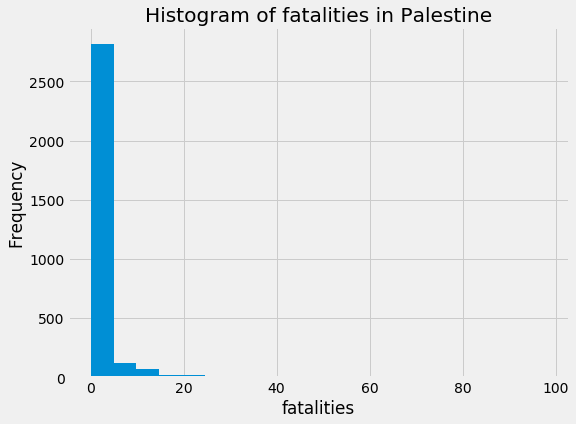

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


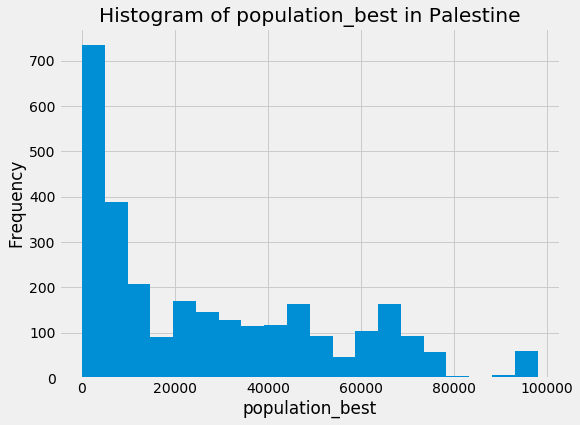

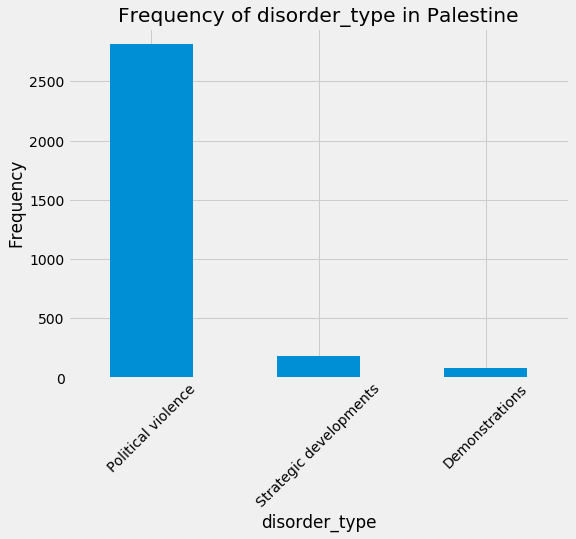

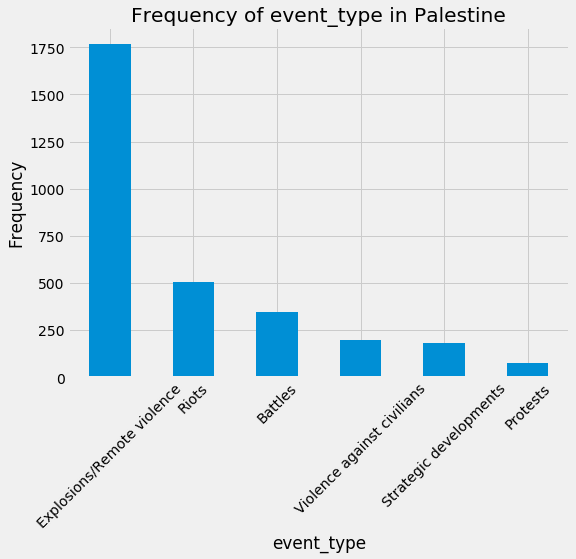

In [ ]:
# Visualize numerical features
numerical_features = ['fatalities', 'population_best']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(palestine_data[feature], bins=20)
    plt.title(f'Histogram of {feature} in Palestine')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Visualize categorical features
categorical_features = ['disorder_type', 'event_type']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    palestine_data[feature].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feature} in Palestine')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Visualize relation of actors and 'interaction' on civilian targeting and fatalities

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


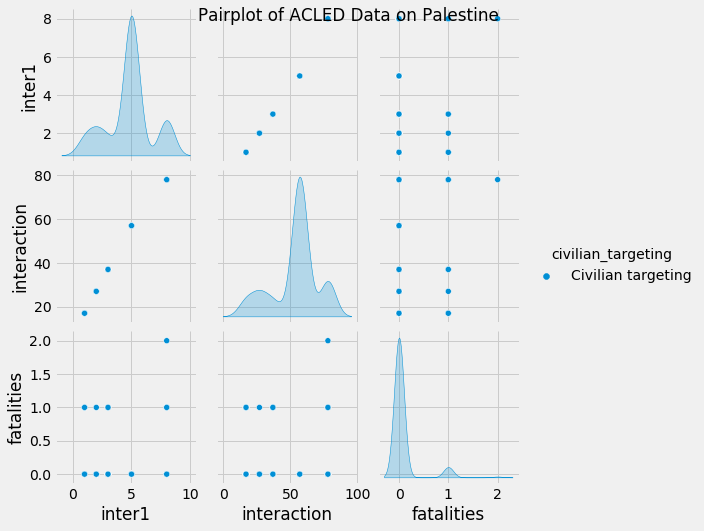

In [ ]:
# Select  columns to review relation of actors and 'interaction' on civilian targeting and fatalities
pal_target_columns = ['actor1', 'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'fatalities']
pal_data_subset = acled_file[pal_target_columns]

# Check for missing values and handle them if necessary
pal_data_subset.dropna(inplace=True)

# Visualize the effects using pairplot
sns.pairplot(pal_data_subset, hue='civilian_targeting', diag_kind='kde')
plt.suptitle('Pairplot of ACLED Data on Palestine')
plt.show()

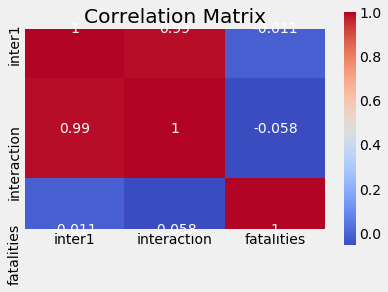

In [ ]:
# Visualize the correlation between variables
correlation_matrix = pal_data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
### Look at Actors

## Groupings

In [ ]:
#Group by Disorder Type
acled_file.groupby('disorder_type')['event_type'].value_counts()

disorder_type                       event_type                
Demonstrations                      Protests                      3136
                                    Riots                           93
Political violence                  Explosions/Remote violence    5124
                                    Battles                       1178
                                    Violence against civilians     646
                                    Riots                          560
Political violence; Demonstrations  Protests                         2
Strategic developments              Strategic developments        1022
Name: event_type, dtype: int64

In [ ]:
#sub_event_type	looks like grouped by 'disorder_type'
acled_file.groupby('disorder_type')['sub_event_type'].value_counts()

disorder_type                       sub_event_type                    
Demonstrations                      Peaceful protest                      3071
                                    Violent demonstration                   93
                                    Protest with intervention               65
Political violence                  Air/drone strike                      2559
                                    Shelling/artillery/missile attack     2294
                                    Armed clash                           1177
                                    Mob violence                           560
                                    Attack                                 488
                                    Remote explosive/landmine/IED          215
                                    Abduction/forced disappearance         158
                                    Grenade                                 54
                                    Suicide bomb            

### Observation: Peaceful protests are occuring along with political violence. Find out which countries.

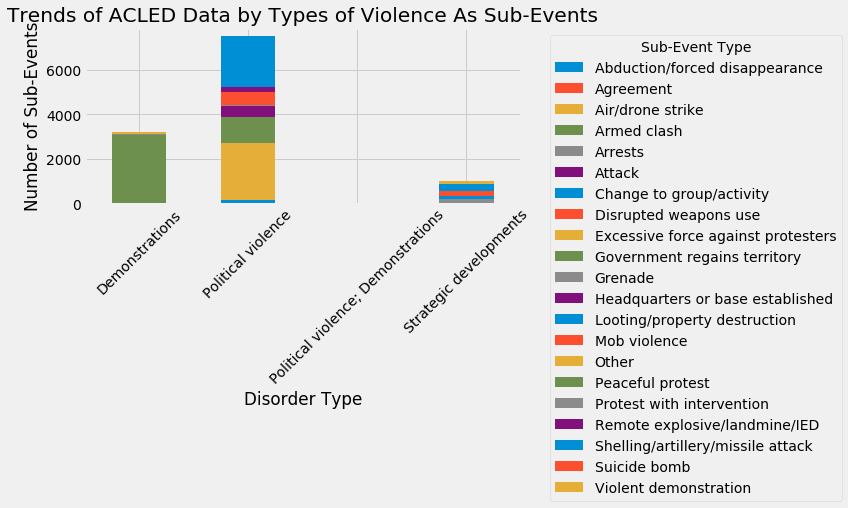

In [ ]:
# Group the data by disorder type and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a stacked bar chart
violence_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trends of ACLED Data by Types of Violence As Sub-Events')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Sub-Events')
plt.legend(title='Sub-Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


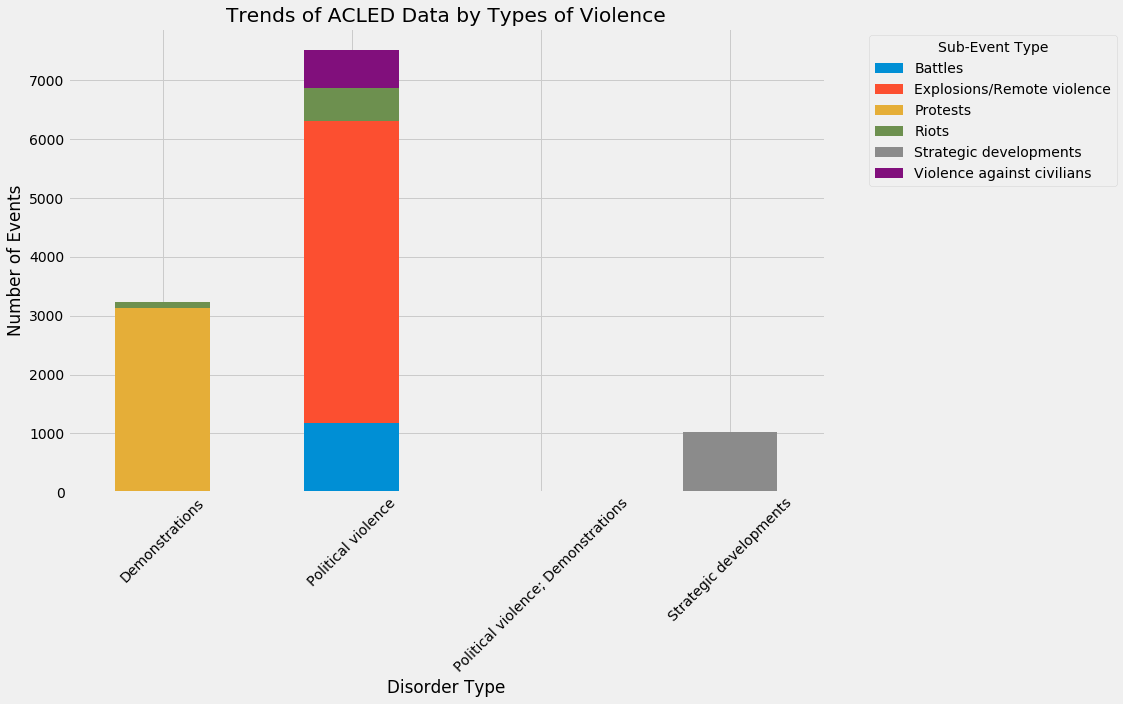

In [ ]:
### Ramadan Aggregate level of Events

# Group the data by disorder type and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a stacked bar chart
violence_trends.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Trends of ACLED Data by Types of Violence')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Events')
plt.legend(title='Sub-Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## By Country

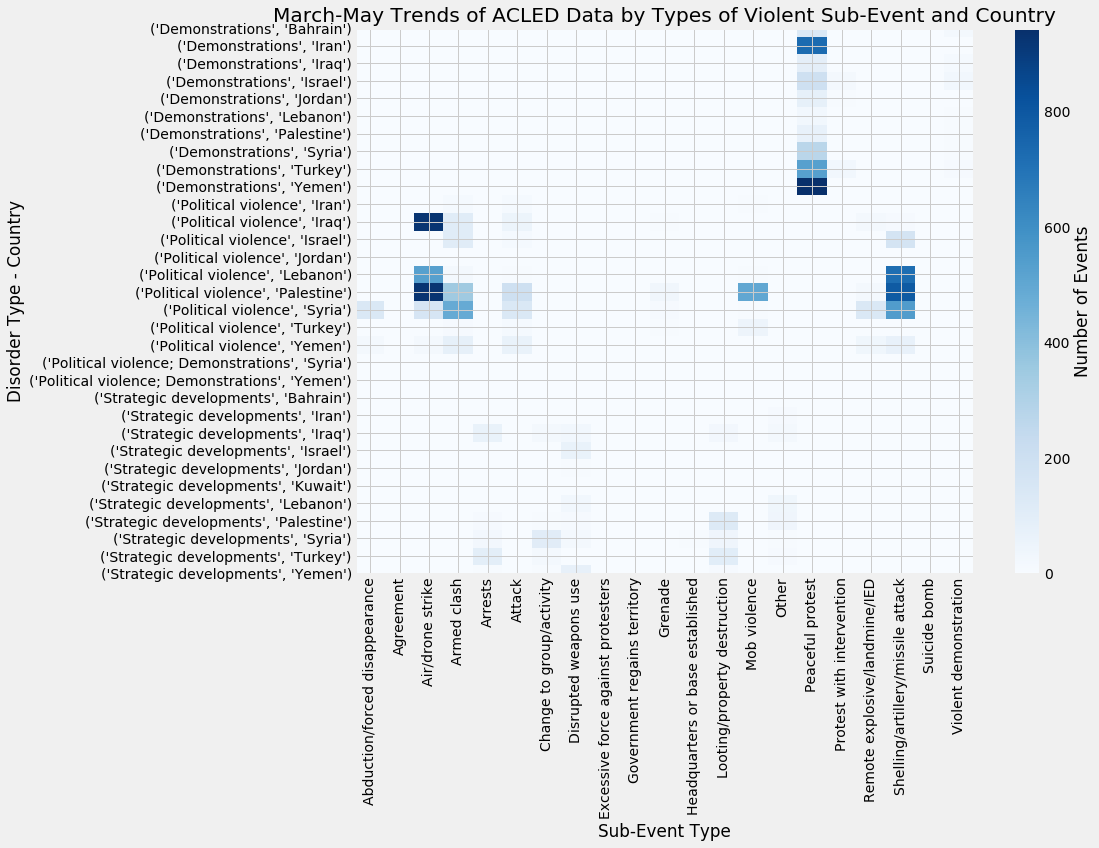

In [ ]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('March-May Trends of ACLED Data by Types of Violent Sub-Event and Country')
plt.xlabel('Sub-Event Type')
plt.ylabel('Disorder Type - Country')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()

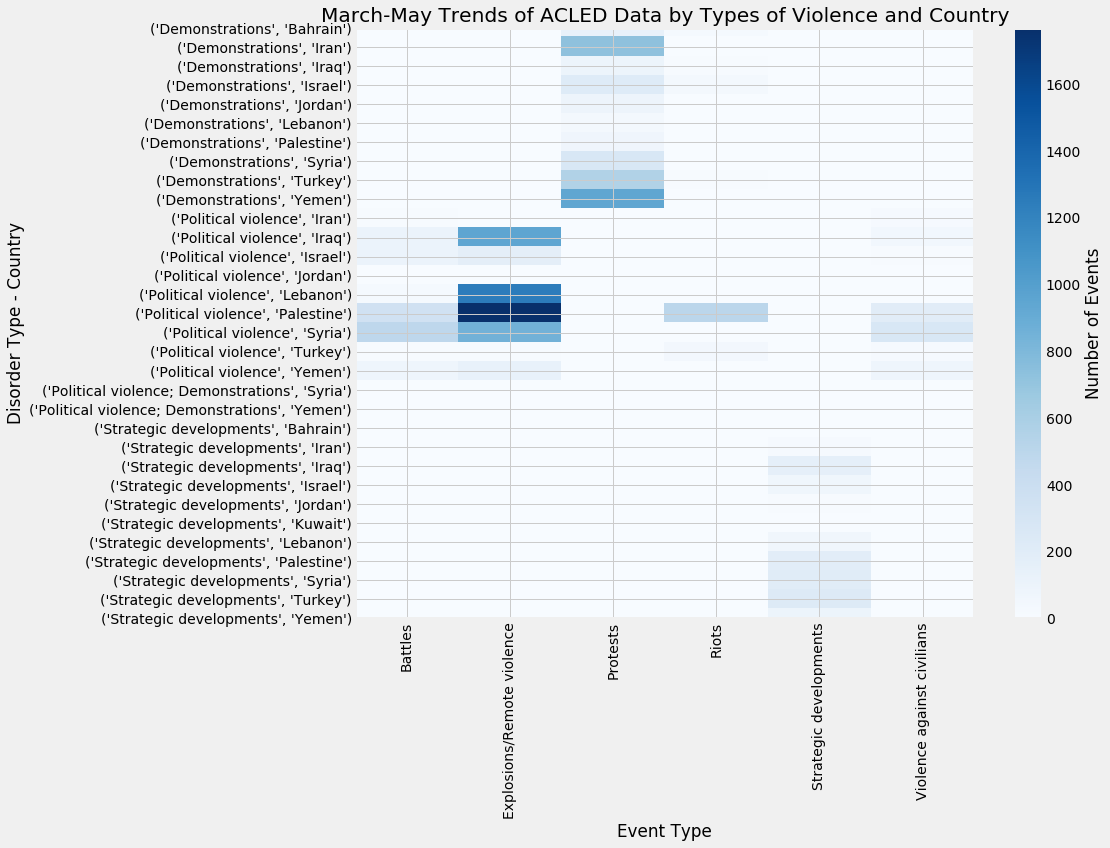

In [ ]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('March-May Trends of ACLED Data by Types of Violence and Country')
plt.xlabel('Event Type')
plt.ylabel('Disorder Type - Country')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()


## Heatmaps

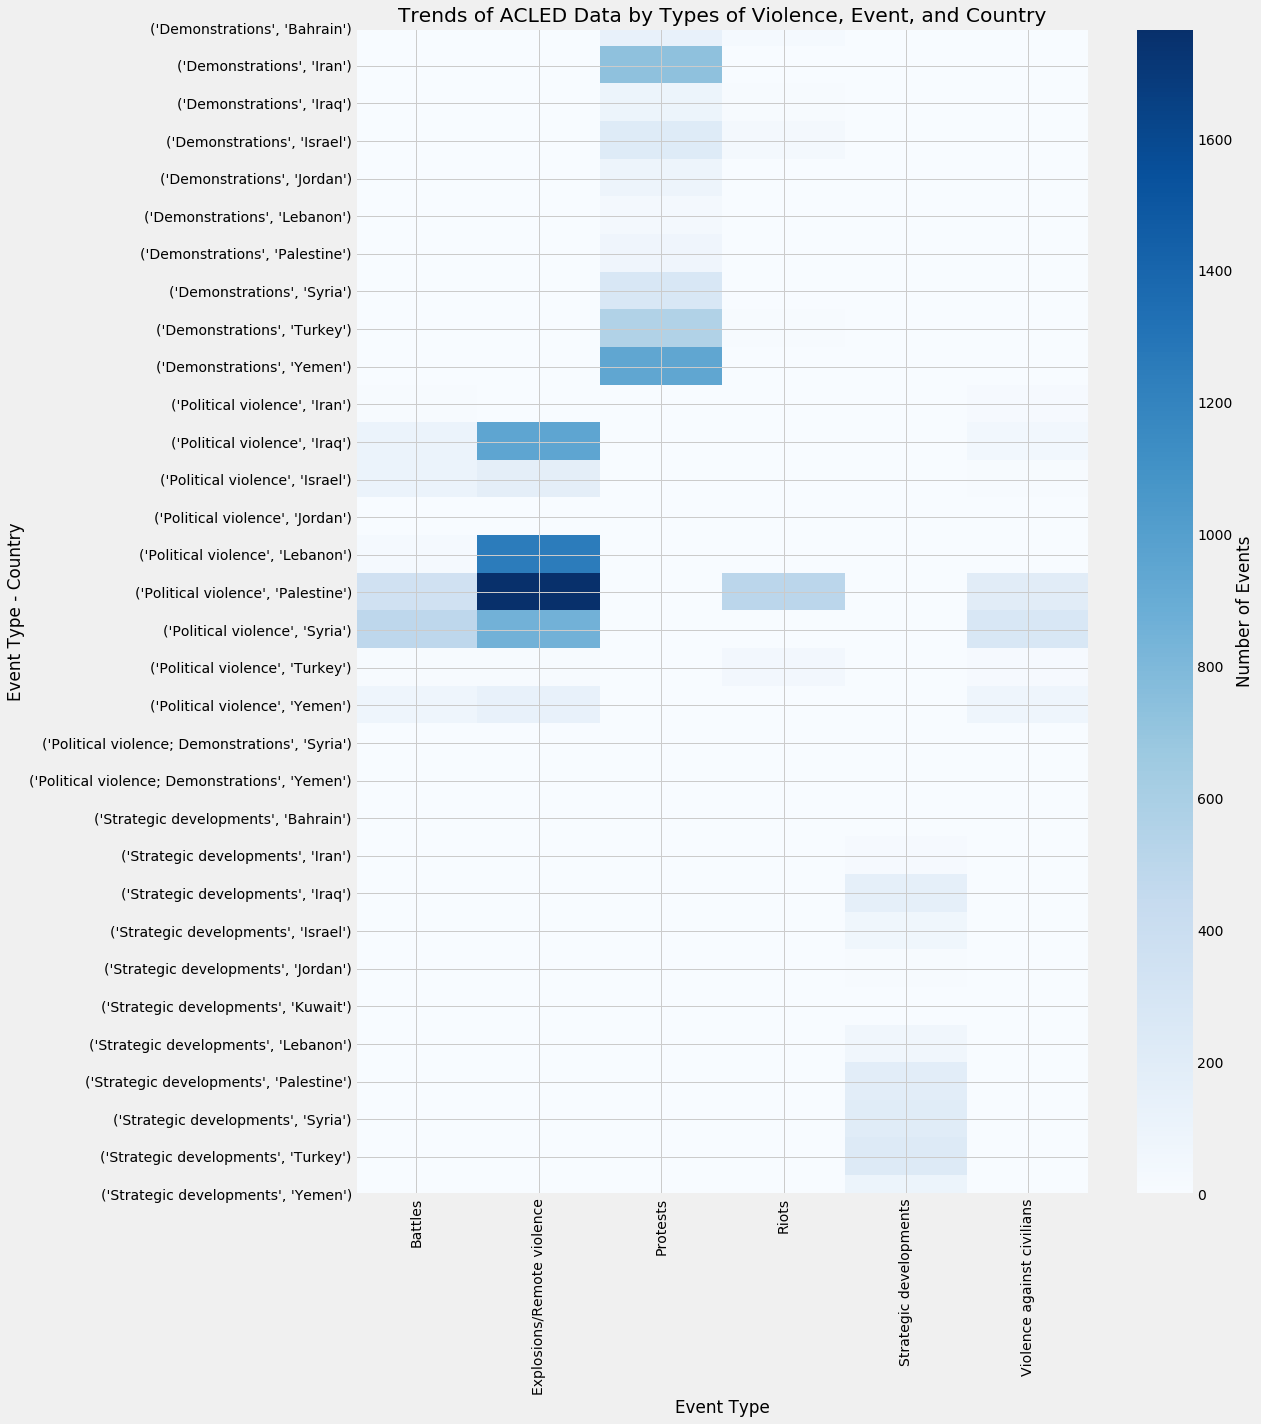

In [ ]:
# Group the data by event type, region, and Event type and count occurrences
violence_trends_country_event = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(18, 20))
plt.imshow(violence_trends_country_event, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Country')
plt.xlabel('Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_country_event.columns)), violence_trends_country_event.columns, rotation=90)
plt.yticks(range(len(violence_trends_country_event.index)), violence_trends_country_event.index)
plt.tight_layout()
plt.show()

## Filter on Palestine, Syria, Lebanon & Israel

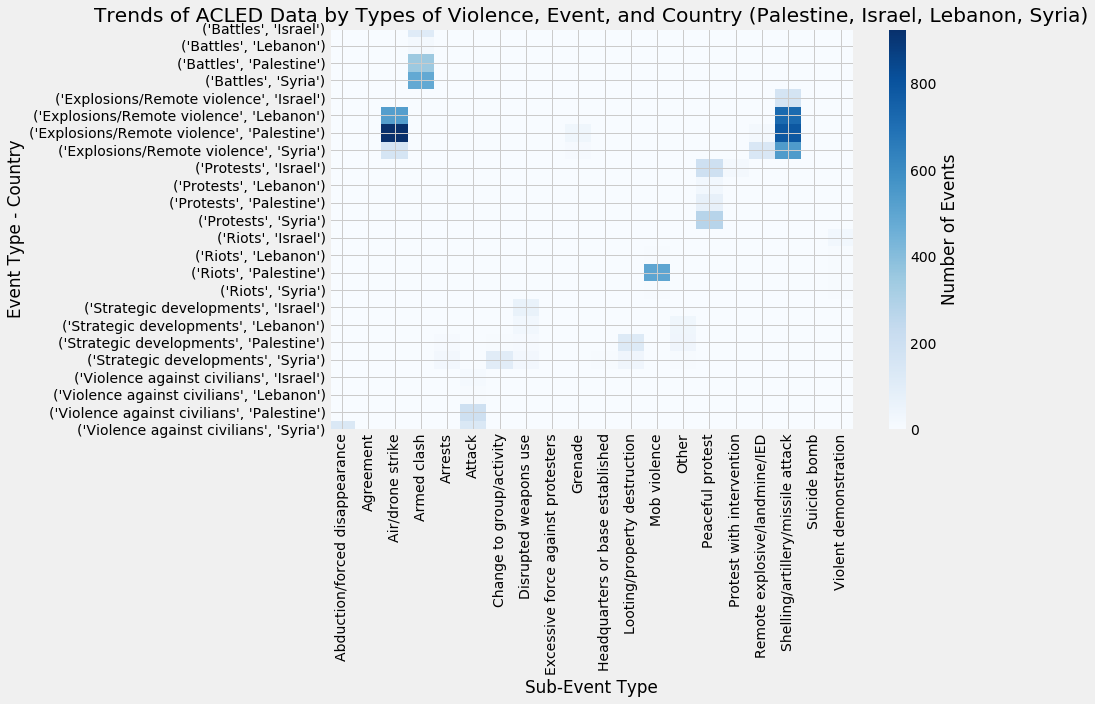

In [ ]:
# Filter the data to include only events in Palestine, Israel, Lebanon, and Syria
selected_countries_pal_lb_syr = ['Palestine', 'Israel', 'Lebanon', 'Syria']
filtered_data_pal_lb_syr = acled_file[acled_file['country'].isin(selected_countries_pal_lb_syr)]

# Group the filtered data by event type, country, and sub-event type and count occurrences
violence_trends_pal_lb_syr = filtered_data_pal_lb_syr.groupby(['event_type', 'country', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(14, 10))
plt.imshow(violence_trends_pal_lb_syr, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Country (Palestine, Israel, Lebanon, Syria)')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_pal_lb_syr.columns)), violence_trends_pal_lb_syr.columns, rotation=90)
plt.yticks(range(len(violence_trends_pal_lb_syr.index)), violence_trends_pal_lb_syr.index)
plt.tight_layout()
plt.show()

## Focus on Casualties
* Use violence_trends_pal_lb_syr

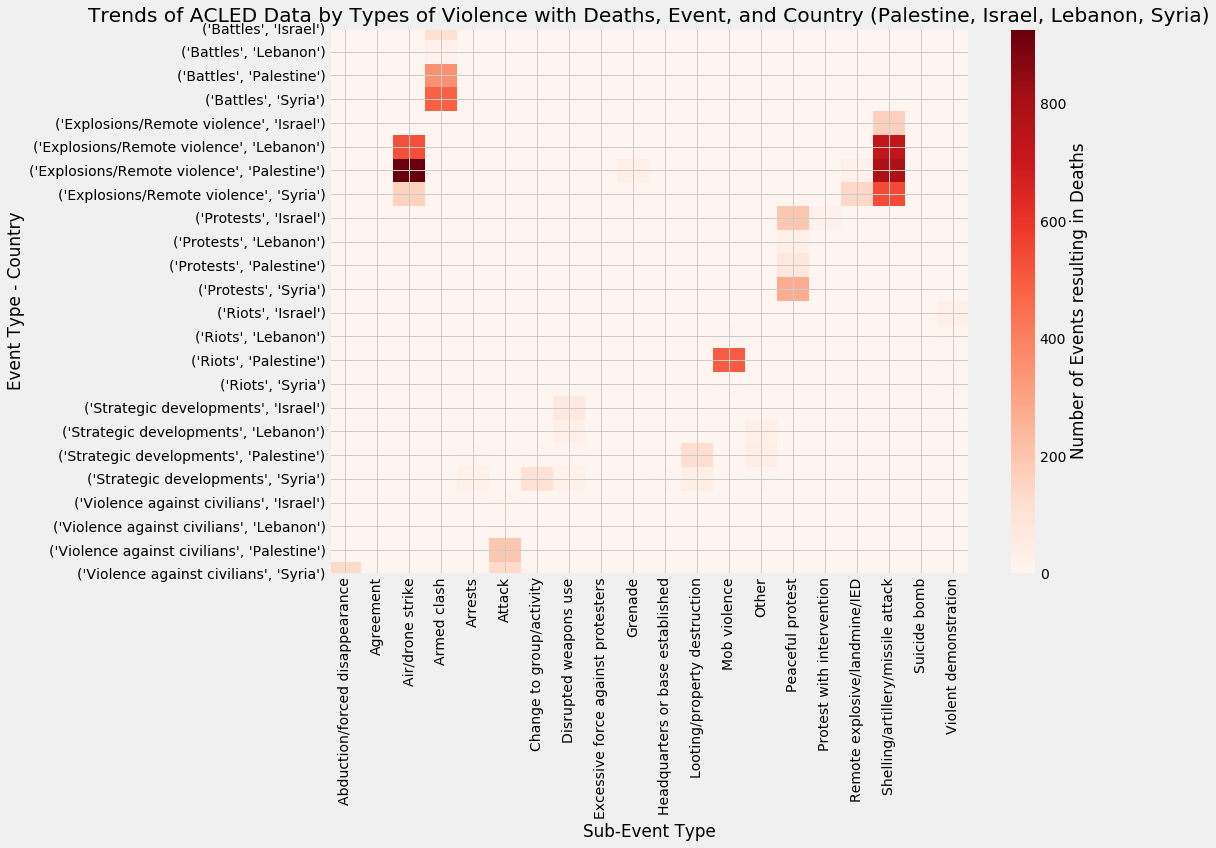

In [ ]:
# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends_pal_lb_syr, cmap='Reds', aspect='auto')
plt.colorbar(label='Number of Events resulting in Deaths')
plt.title('Trends of ACLED Data by Types of Violence with Deaths, Event, and Country (Palestine, Israel, Lebanon, Syria)')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_pal_lb_syr.columns)), violence_trends_pal_lb_syr.columns, rotation=90)
plt.yticks(range(len(violence_trends_pal_lb_syr.index)), violence_trends_pal_lb_syr.index)
plt.tight_layout()
plt.show()

In [ ]:
#Twitter came up as a source
source_most_cited = acled_file.groupby("country")['source'].value_counts()
source_most_cited  #How many times was Twitter a primary source?

country  source                                                             
Bahrain  14 February Revolution Youth Coalition                                 36
         14 February Revolution Youth Coalition; Bahrain Alyoum                 35
         Bahrain Alyoum                                                         21
         ADHRB                                                                  10
         14 February Revolution Youth Coalition; Bahrain Alyoum; LuaLua TV       9
                                                                                ..
Yemen    Xinhua; Yemeni Army - Houthi                                            1
         Yemen Data Project; YNP                                                 1
         Yemen Data Project; Yemen Future; Yemen News Agency (SABA) - Houthi     1
         Yemen Data Project; Yemen Press Agency                                  1
         Yemen Window                                                            1
Name: sour

### How many times was Twitter a primary source?

In [ ]:
#How many times was Twitter a primary source?
substr = 'Twitter'
print (acled_file.source.str.count(substr).sum())

1891


In [ ]:
#Call apply on the 'scores' column on the groupby object and use the vectorise str method contains, use this to filter the group and call count: In :
#df.groupby(['catA', 'catB'])['scores'].apply(lambda x: x[x.str.contains('RET')].count())

countries_Twitter_source = acled_file.groupby(['country', 'disorder_type'])['source'].apply(lambda x: x[x.str.contains("Twitter")].count())
countries_Twitter_source

country    disorder_type                     
Bahrain    Demonstrations                           0
           Strategic developments                   0
Iran       Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Iraq       Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Israel     Demonstrations                           0
           Political violence                       1
           Strategic developments                   1
Jordan     Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Kuwait     Strategic developments                   0
Lebanon    Demonstrations                           0
           Political violence                     534
           Strategic developments   

In [ ]:
countries_Twitter_type = acled_file.groupby(['country', 'source'])['disorder_type'].apply(lambda x: x[x.str.contains("Twitter")].count())
countries_Twitter_type

country  source                                                                                         
Bahrain  14 February Revolution Youth Coalition                                                             0
         14 February Revolution Youth Coalition; ADHRB                                                      0
         14 February Revolution Youth Coalition; ADHRB; AhlulBayt News Agency; Bahrain Alyoum; LuaLua TV    0
         14 February Revolution Youth Coalition; ADHRB; Bahrain Alyoum                                      0
         14 February Revolution Youth Coalition; ADHRB; Bahrain Alyoum; Bahrain Mirror                      0
                                                                                                           ..
Yemen    Yemen Data Project; Yemen News Agency (SABA) - Houthi                                              0
         Yemen Data Project; Yemen News Agency (SABA) - Houthi; Yemeni Army - Houthi                        0
         Yemen 

In [ ]:
#Sort for Twitter as source
countries_Twitter_type.sort_values(ascending=False)

country    source                                                          
Yemen      Yemen Window                                                        0
Israel     Makor Rishon; N12                                                   0
           Long War Journal                                                    0
           Long War Journal; Newpress                                          0
           Ma'ariv                                                             0
                                                                              ..
Palestine  Arab 48; Ma'an News Agency; Newpress; Quds News Network             0
           Arab 48; Ma'an News Agency; Newpress; Quds News Network; Twitter    0
           Arab 48; Ma'an News Agency; Newpress; Twitter                       0
           Arab 48; Ma'an News Agency; PLO Negotiations Affairs Department     0
Bahrain    14 February Revolution Youth Coalition                              0
Name: disorder_type, Length: 1660

In [ ]:
# Understand the sub-area  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'source_scale','event_type']].head(20).sort_values(by='country')

country                                     actor1  \
4   Bahrain                       Protesters (Bahrain)   
5   Bahrain                       Protesters (Bahrain)   
6   Bahrain                       Protesters (Bahrain)   
7   Bahrain                       Protesters (Bahrain)   
8   Bahrain                       Protesters (Bahrain)   
9      Iran                          Protesters (Iran)   
10     Iran                          Protesters (Iran)   
11     Iran                          Protesters (Iran)   
17     Iraq                          Protesters (Iraq)   
16     Iraq  Military Forces of Iraq (2022-) Peshmerga   
15     Iraq            Unidentified Armed Group (Iraq)   
18     Iraq                          Protesters (Iraq)   
12     Iraq          Military Forces of Turkey (2016-)   
13     Iraq            Unidentified Armed Group (Iraq)   
14     Iraq              Police Forces of Iraq (2022-)   
19   Israel                        Protesters (Israel)   
0     Syria           Military Forces of Syria (2000-)   
2     Yemen                         Protesters (Yemen)   
1     Yemen    Military Forces of Yemen (2017-) Houthi   
3     Yemen                         Protesters (Yemen)   

                                               source            source_scale  \
4   14 February Revolution Youth Coalition; Bahrai...          Other-National   
5   14 February Revolution Youth Coalition; Bahrai...          Other-National   
6   14 February Revolution Youth Coalition; Bahrai...          Other-National   
7                                      Bahrain Alyoum                National   
8                                      Bahrain Alyoum                National   
9                                       Eteraze Bazar               New media   
10                     Baloch Campaign; Eteraze Bazar         Other-New media   
11                     Baloch Campaign; Eteraze Bazar         Other-New media   
17                                          Al Mirbad                National   
16                                           ANF News           International   
15  Al Mada; Al Maloomah; Al Mirbad; Al Sumaria TV...                National   
18                                          Al Mirbad                National   
12                                           ROJ News                Regional   
13  Al Mirbad; Baghdad Today; Basnews; GardaWorld;...       Other-Subnational   
14  Al Ghad Press; Al Mada; Al Maloomah; Baghdad T...                National   
19  Haaretz; Israel Hayom; Ma'ariv; N12; Srugim; T...                National   
0                                         SHAAM; SOHR          Other-National   
2   Yemen Data Project; Yemen News Agency (SABA) -...  Local partner-National   
1   Ansar Allah; The Washington Institute; UKMTO; ...  Local partner-National   
3   Yemen Data Project; Yemen News Agency (SABA) -...  Local partner-National   

                    event_type  
4                     Protests  
5                     Protests  
6                     Protests  
7                     Protests  
8                     Protests  
9                     Protests  
10                    Protests  
11                    Protests  
17                    Protests  
16      Strategic developments  
15  Violence against civilians  
18                    Protests  
12  Explosions/Remote violence  
13  Explosions/Remote violence  
14      Strategic developments  
19                    Protests  
0   Explosions/Remote violence  
2                     Protests  
1   Explosions/Remote violence  
3                     Protests

In [ ]:
# Understand the subarea  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'event_type']].head(20).value_counts()

country  actor1                                     source                                                                                                                                event_type                
Yemen    Protesters (Yemen)                         Yemen Data Project; Yemen News Agency (SABA) - Houthi                                                                                 Protests                      2
Iraq     Protesters (Iraq)                          Al Mirbad                                                                                                                             Protests                      2
Iran     Protesters (Iran)                          Baloch Campaign; Eteraze Bazar                                                                                                        Protests                      2
Bahrain  Protesters (Bahrain)                       Bahrain Alyoum                                                                   

## Actor Analysis
** Subset the data for Palestine and Israel actors

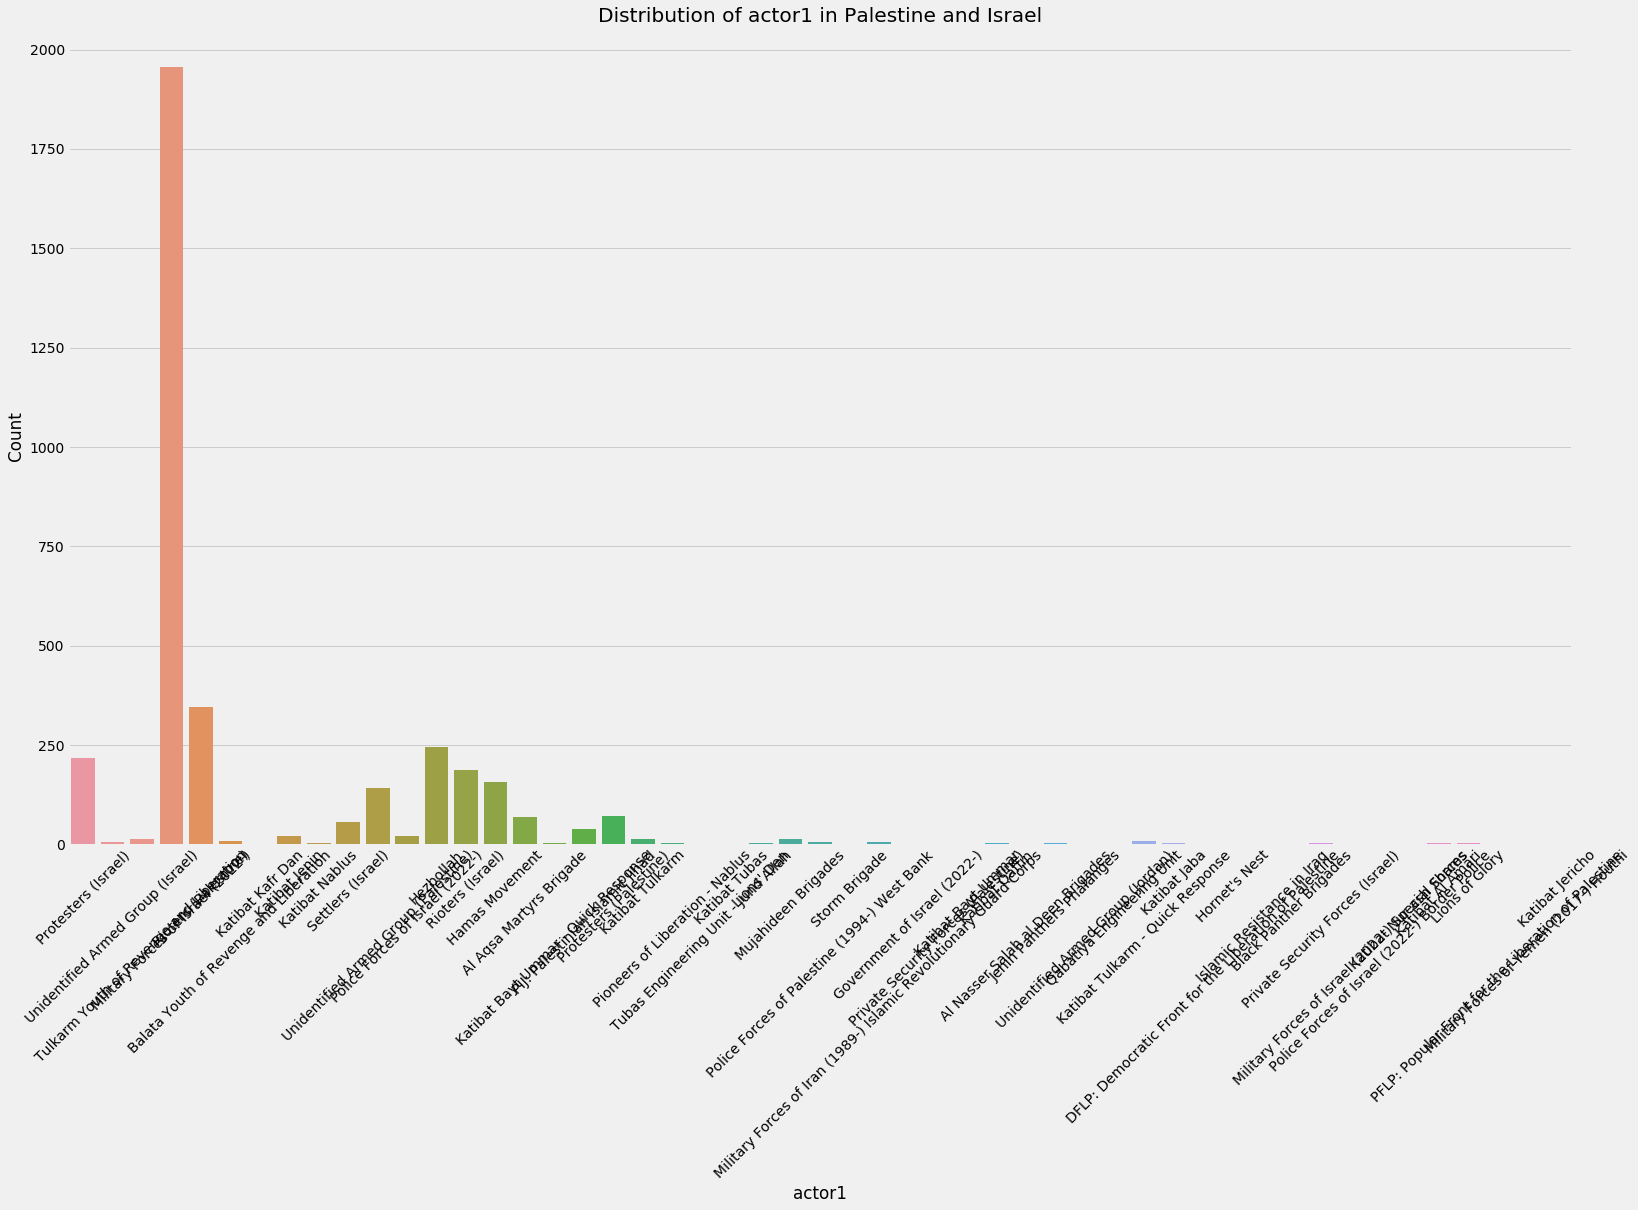

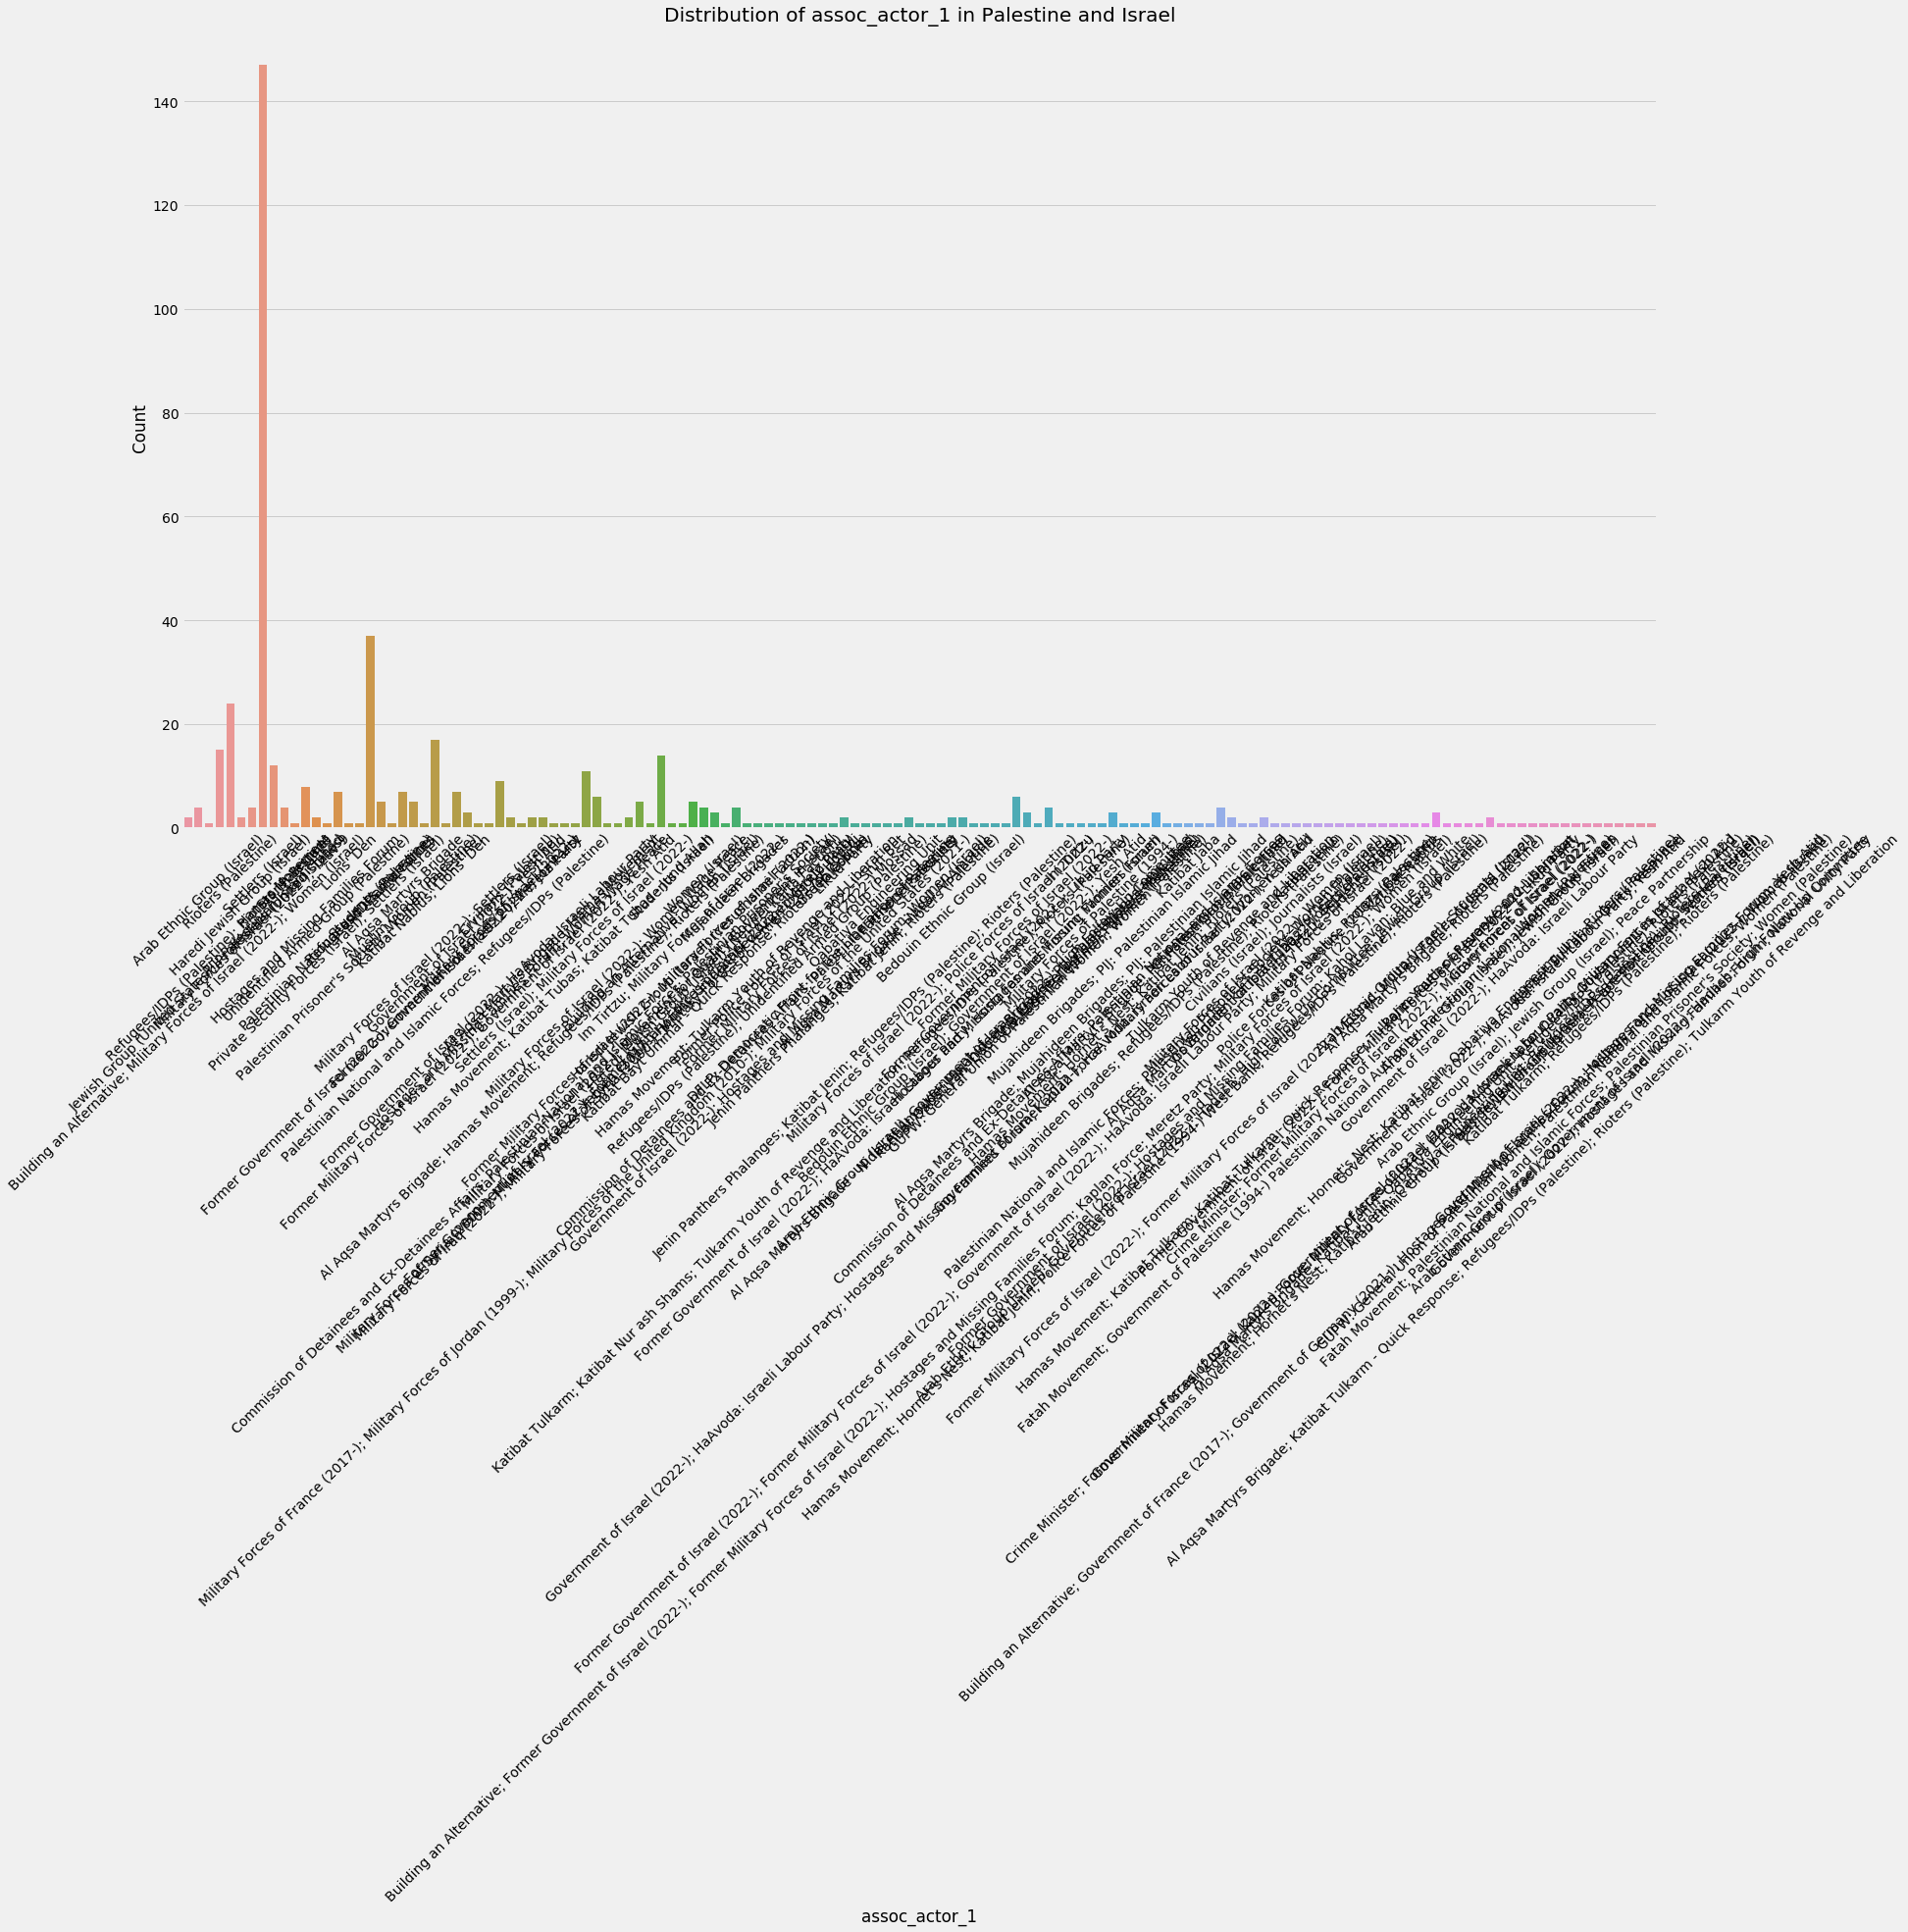

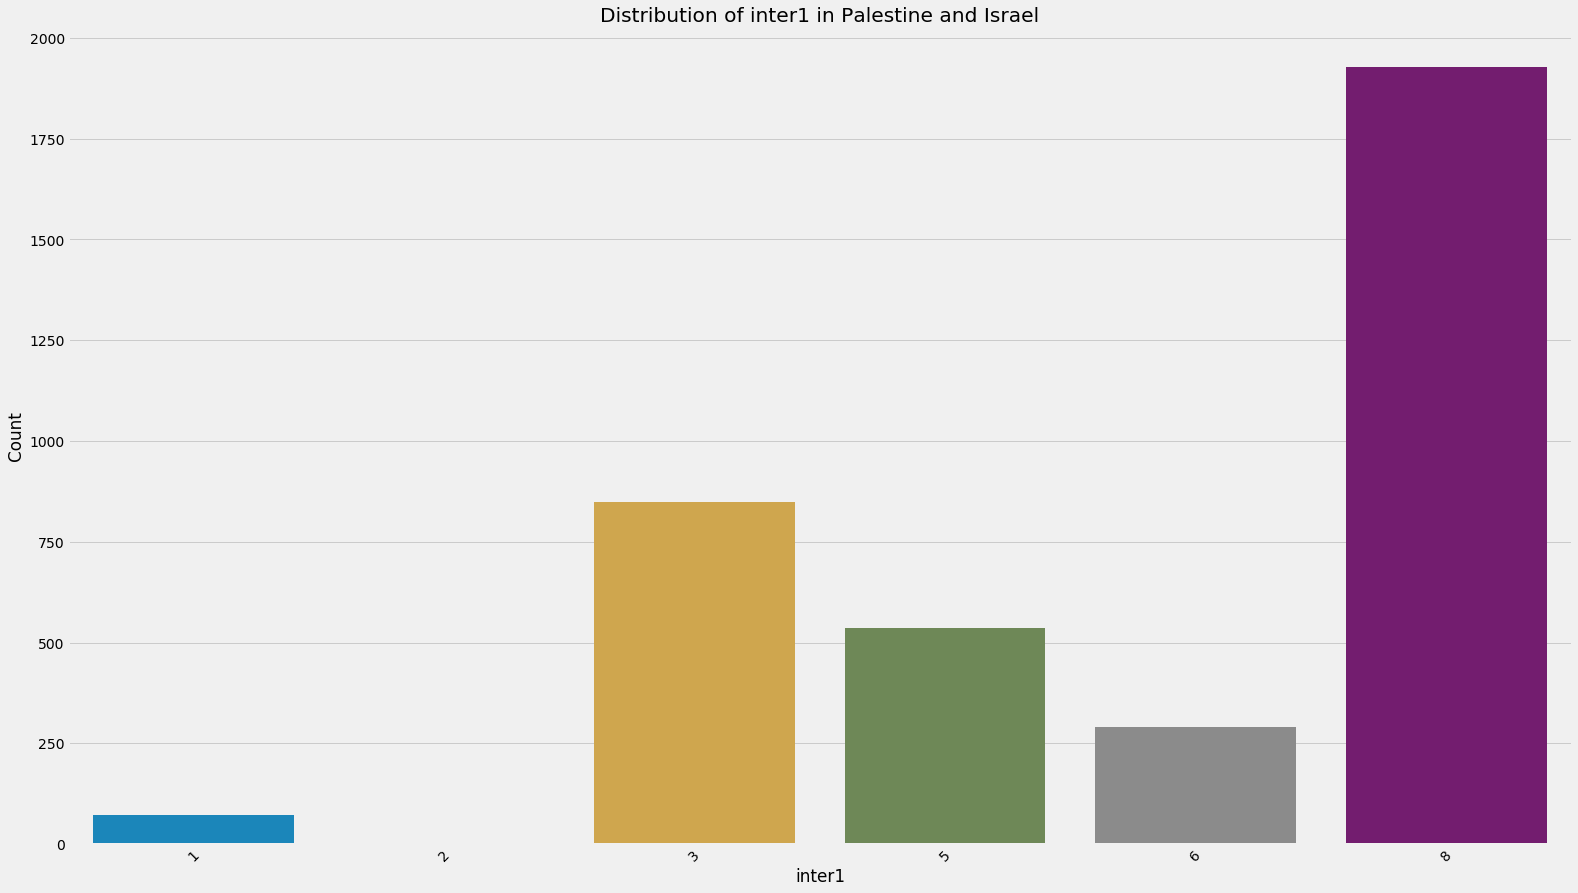

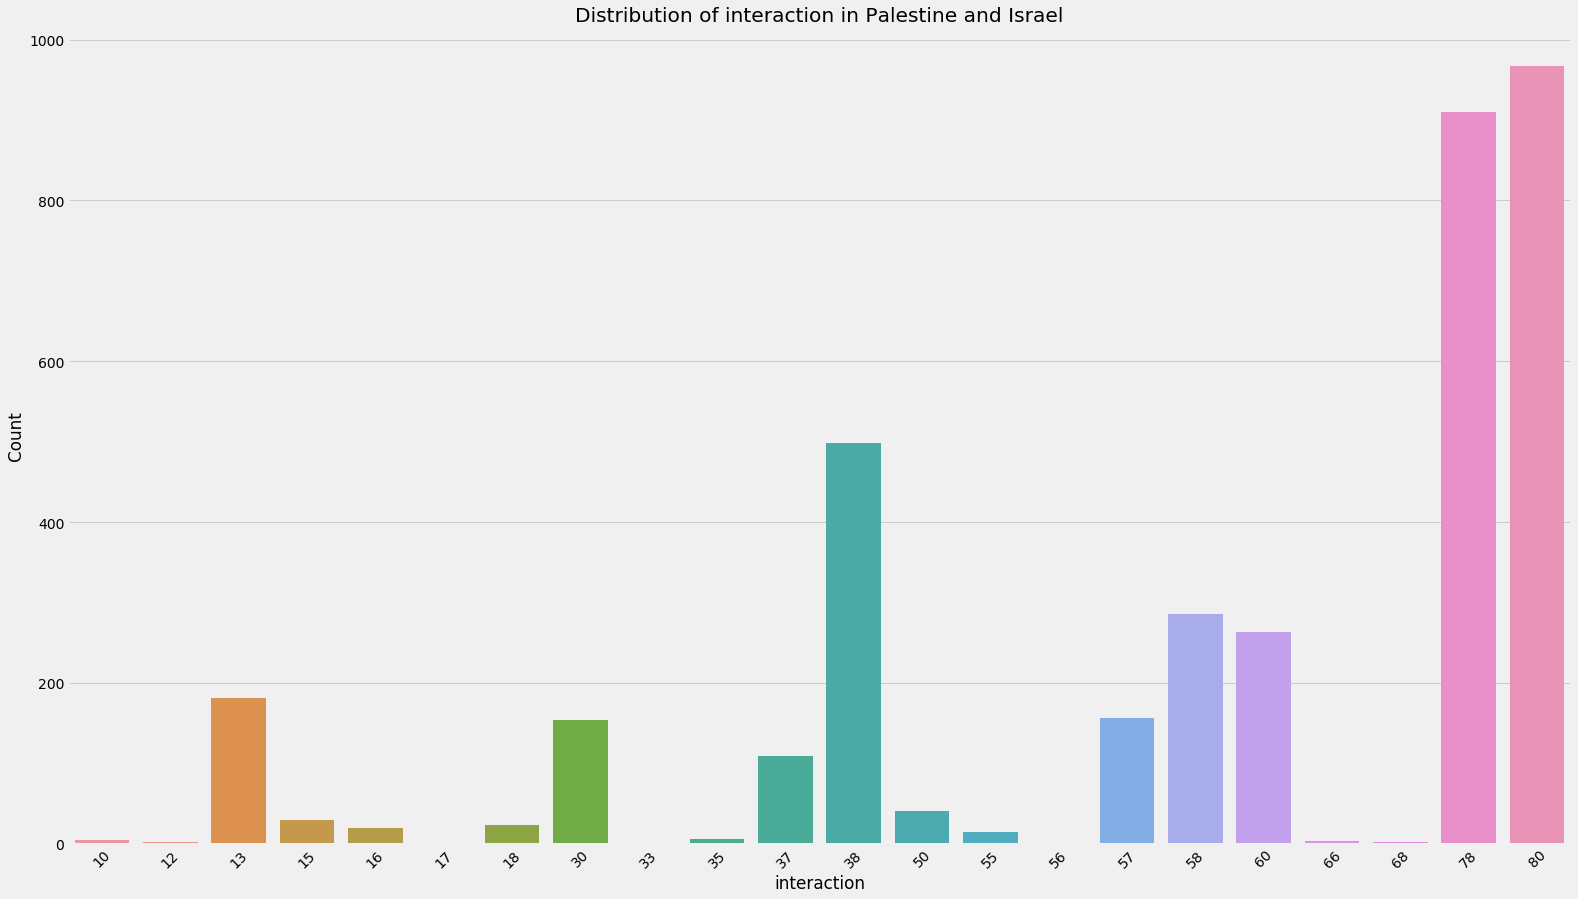

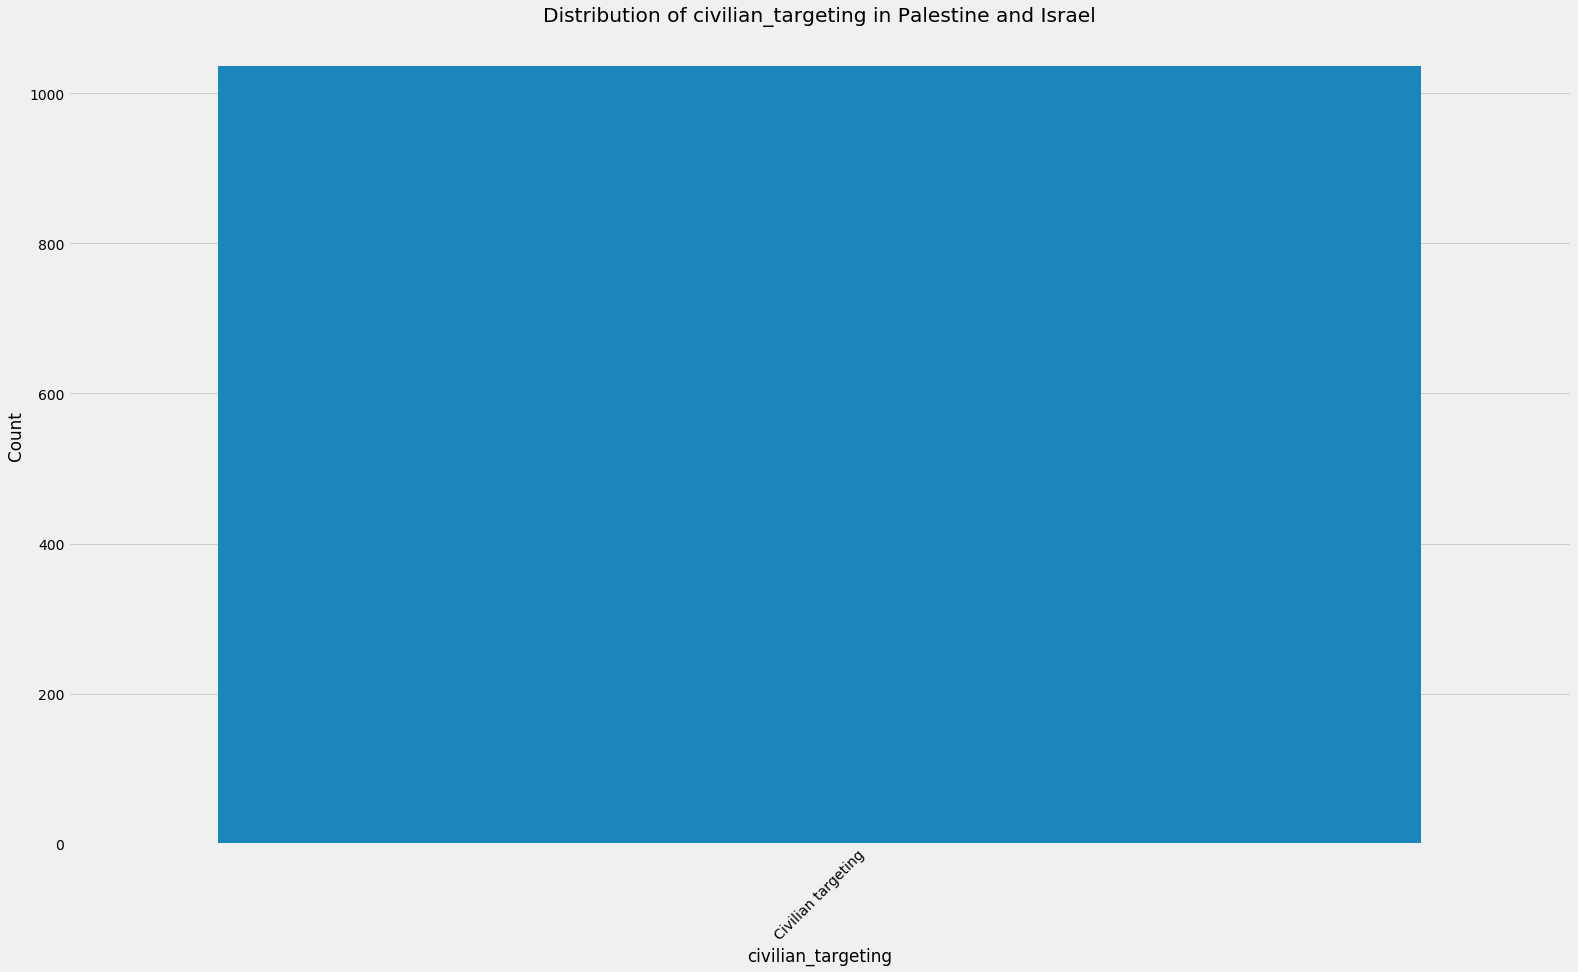

In [ ]:
# Subset the data to include only events in Palestine and Israel
selected_pal_israel = ['Palestine', 'Israel']
pal_israel_data = acled_file[acled_file['country'].isin(selected_pal_israel)]

# Select relevant features
selected_features_2 = ['actor1', 'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting']

# Explore the selected features
for feature in selected_features_2:
    plt.figure(figsize=(24, 14))
    sns.countplot(x=feature, data=pal_israel_data)
    plt.title(f'Distribution of {feature} in Palestine and Israel')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1008x576 with 0 Axes>

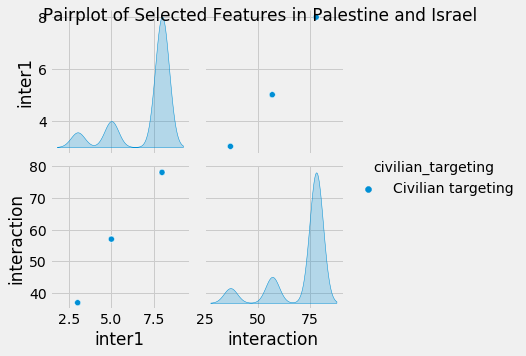

Chi-square statistic: 0.0
p-value: 1.0


In [ ]:
# Visualize relationships between features
plt.figure(figsize=(14, 8))

#Swap in the subset data
sns.pairplot(pal_israel_data[selected_features_2], hue='civilian_targeting') #Refer to selected_feataures_2 above
plt.suptitle('Pairplot of Selected Features in Palestine and Israel')
plt.show()

# Statistical analysis (if needed)
# For example: Conduct chi-square test for independence between categorical variables

# Chi-square test for independence between actor1 and civilian_targeting
from scipy.stats import chi2_contingency

#Swap in subset data
contingency_table_pal = pd.crosstab(pal_israel_data['actor1'], pal_israel_data['civilian_targeting'])
chi2, p_value, _, _ = chi2_contingency(contingency_table_pal)
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p_value}')

## I don't understand the distinction between 'disorder type' and 'sub_event_type'.
Is political violence when the state is involved?

In [ ]:
#Plot country and Number of Events
funny = acled_file['country']

plt.figure(figsize=(15,10))
funny.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Reported Event")
plt.ylabel("Number of Events")
plt.show()

TypeError: 'int' object is not callable

<Figure size 1080x720 with 0 Axes>

## Word Cloud

In [ ]:
?WordCloud

In [ ]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'df' is not defined

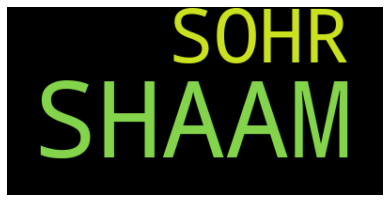

In [ ]:
# Start with one source:
text = acled_file.source[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

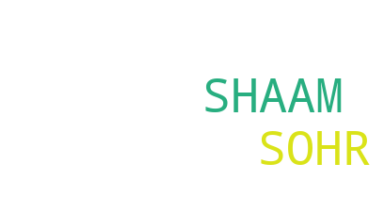

In [ ]:
#Adjust to white background and making most counted source smaller in size
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

FileNotFoundError: [Errno 2] No such file or directory: 'img/first_review.png'

### So now you'll combine all source into one big text and create a big fat cloud to see which sources are most common in these wines.
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

In [ ]:
#Create a list of all the text in source column
text_in_source_column = " ".join(review for review in acled_file.source)
print ("There are {} words in the combination of all sources.".format(len(text_in_source_column)))

There are 388410 words in the combination of all sources.


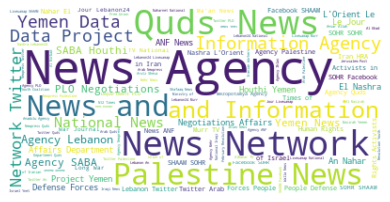

In [ ]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
stopwords = nltk.corpus.stopwords.words('english') # Need to include for English dictionary
                                                    #B/c error thrown: https://stackoverflow.com/questions/39536767/lazycorpusloader-object-is-not-iterable

# Generate a word cloud image from text_in_source_column
wordcloud_source = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_source_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.axis("off")
plt.show()

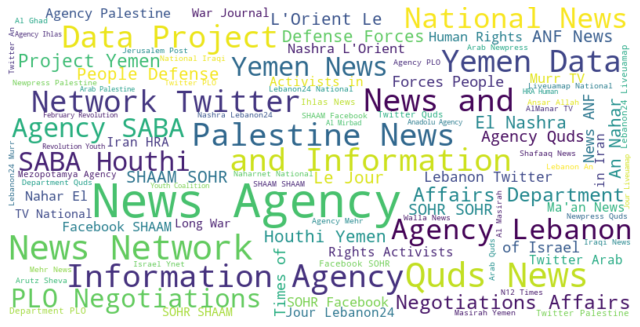

In [ ]:
# Use text_in_source_column
#increase max_font_size, change the maximum number of word and lighten the background:
wordcloud_source_bigger = WordCloud(max_font_size=60, max_words=100, width=800, height=400,background_color="white").generate(text_in_source_column)
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_source_bigger, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud Exercise on 'notes' column

In [ ]:
#check stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Create a list of all the text in 'notes' column
text_in_notes_column = " ".join(review for review in acled_file.notes)
print ("There are {} words in the combination of all notes.".format(len(text_in_notes_column)))

There are 2775551 words in the combination of all notes.


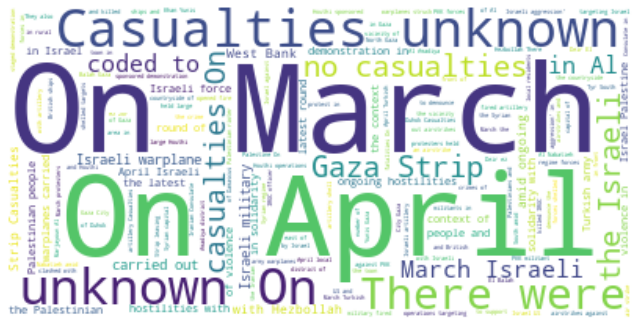

In [ ]:
#update stopwords
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = set(STOPWORDS)
#stopwords.update(["in", 'as','to','On','and'])

# Generate a word cloud image from text_in_notes_column
wordcloud_notes = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_notes_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_notes, interpolation='bilinear')
plt.axis("off")
plt.show()